# **TDS Project: Part 2 - Advanced Model Analysis, Optimization, and Conclusions**
**Group Members:**

- Adir Elmakais - 316413640

## **Introduction**

In Part 1 of this project, we developed a baseline machine learning pipeline to predict student exam scores using the "Student Performance Factors" dataset. While the initial model showed promise, achieving an R² score of 0.62, our error analysis revealed several areas for improvement. Specifically, we identified:

1. **Model Bias:** A tendency to slightly underestimate exam scores.
2. **Heteroscedasticity in Residuals:** Inconsistent prediction error across the range of predicted scores, suggesting the model performed less reliably for students expected to achieve very high or very low scores.
3. **Potential Non-linear Relationships:** Evidence that relationships between certain features (e.g., attendance, hours studied) and exam scores might not be strictly linear, indicating the need for more complex modeling approaches.
4. **Influence of Outliers:** A small number of extreme data points potentially skewing the model's understanding of typical student performance.

This second part of the project aims to build upon the initial pipeline and address these weaknesses through a series of refinements. Our primary goal is to develop a more accurate, robust, and interpretable model for predicting student exam scores.

**Key Objectives:**

*   **Optimize Model Performance:** Enhance the XGBoost Regressor through systematic hyperparameter tuning using GridSearchCV.
*   **Engineer Informative Features:** Create new features based on domain knowledge and insights from Part 1, such as interaction terms and transformations of existing features (e.g., applying log transformations to skewed variables). This now includes a combined interaction term, `Hours_Attendance_Interaction`, to capture the joint effect of study hours and attendance.
*   **Handle Outliers:** Implement an outlier detection and mitigation strategy (capping) to reduce the influence of extreme values without discarding potentially valuable data.
*   **Improve Model Interpretability:** Utilize advanced diagnostic tools like SHAP (SHapley Additive exPlanations) and Partial Dependence Plots to gain deeper insights into feature importance and the model's decision-making process.

By achieving these objectives, we expect to not only boost the model's predictive accuracy (as measured by R², Adjusted R², MAE, and RMSE) but also to mitigate the biases and inconsistencies identified in the baseline model. Furthermore, we aim to provide educators and policymakers with clearer, more actionable insights into the factors that most strongly influence student success, ultimately contributing to more effective interventions and support strategies.

## Loading the Baseline Model and Data
We'll begin by loading the cleaned dataset and the baseline model saved in Part 1. This will allow us to build upon the existing pipeline and apply further optimizations.

In [281]:
import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Setting plot styles
sns.set_theme(style="whitegrid")
%matplotlib inline

# Paths to the cleaned data and the baseline model
cleaned_data_path = os.path.join('data', 'StudentPerformaceFactorsClean.csv')
model_path = os.path.join('models', 'pipeline_model.joblib')

# Loading the cleaned dataset
data_cleaned = pd.read_csv(cleaned_data_path)
print("Cleaned dataset loaded successfully.")

# Loading the baseline model
pipeline = joblib.load(model_path)
print("Baseline model loaded successfully.")


Cleaned dataset loaded successfully.
Baseline model loaded successfully.


## **Key Findings from Part 1 and Proposed Action Plan**

The error analysis conducted in Part 1 provided valuable insights into the baseline model's strengths and weaknesses. These findings have informed a targeted action plan for improving model performance, robustness, and interpretability in Part 2.

### **Key Findings:**

1. **Residual Distribution:**

    *   **Observation:** The residual plot revealed slight heteroscedasticity, indicating that the model's prediction errors were not consistent across the range of predicted exam scores. Specifically, the variance of errors appeared larger for students predicted to score very high or very low.
    *   **Implication:** This suggests that the model might be less reliable when predicting scores for students at the extremes of the performance spectrum. The underlying relationships between features and exam scores might be more complex in these ranges, or there could be insufficient data to accurately capture these patterns.

2. **Subgroup Performance:**

    *   **Observation:** The model exhibited weaker performance for students with either "Low" or "High" levels of parental involvement, compared to those with "Medium" parental involvement.
    *   **Implication:** This suggests a potential non-linear relationship between parental involvement and exam scores. The model, in its initial form, might be struggling to capture the nuances of how parental involvement impacts student performance at different levels. A simple linear relationship might be insufficient to model this complexity.

3. **Feature Importance:**

    *   **Observation:** SHAP analysis identified `Attendance`, `Hours_Studied`, and `Previous_Scores` as the most significant predictors of exam scores.
    *   **Implication:** These features are not only statistically significant but also practically relevant. They represent factors that schools, parents, and students can potentially influence. However, the presence of interaction effects and non-linear relationships suggested by other analyses indicates that a deeper understanding of how these features work together is needed.

4. **Bias in Predictions:**

    *   **Observation:** The model demonstrated a slight tendency to underestimate exam scores.
    *   **Implication:** This bias suggests that the model might be setting the bar too low for some students in terms of predicted performance. It could lead to a less optimistic outlook than is warranted and potentially impact the allocation of resources or interventions.

5. **Outliers:**

    *   **Observation:** A handful of data points exhibited extreme values in features like `Hours_Studied`, potentially distorting the model's understanding of typical student behavior.
    *   **Implication:** While these outliers could represent genuinely exceptional students, they might also be due to data entry errors or special circumstances. If not handled appropriately, they could disproportionately influence the model's parameters and lead to biased predictions.

### **Action Plan:**

Based on these findings, we propose the following action plan for Part 2:

1. **Hyperparameter Tuning:**

    *   **Goal:** Systematically optimize the XGBoost model's hyperparameters to improve its overall predictive accuracy and address the identified biases.
    *   **Approach:** Employ GridSearchCV to explore a range of hyperparameter combinations, focusing on parameters like `n_estimators`, `max_depth`, `learning_rate`, `subsample`, and `colsample_bytree`. We will specifically investigate whether adjusting these parameters can mitigate the underestimation bias and improve performance across different subgroups.

2. **Feature Engineering:**

    *   **Goal:** Create new features that capture potential non-linear relationships and interaction effects, enhancing the model's ability to represent the complexity of the data.
    *   **Approach:**
        *   Introduce an interaction term, `Hours_Attendance_Interaction` (combining `Hours_Studied` and `Attendance`), to model the combined effects of these factors.
        *   Apply log transformations to skewed features like `Previous_Scores` to address potential heteroscedasticity and reduce the influence of extreme values.
        *   Create polynomial features like `Hours_Studied_Squared` to capture potential diminishing or accelerating returns on study time.

3. **Handling Outliers:**

    *   **Goal:** Moderate the influence of extreme values without discarding potentially valuable information.
    *   **Approach:** Implement a capping strategy based on the Interquartile Range (IQR) to limit the impact of outliers on the model's parameters. This will help create a more robust model that is less sensitive to unusual data points.

4. **Refinement and Evaluation:**

    *   **Goal:** Continuously evaluate the impact of each refinement step and compare the improved model's performance against the baseline.
    *   **Approach:**
        *   Train and evaluate the model after each stage of hyperparameter tuning and feature engineering.
        *   Use metrics like R², Adjusted R², MAE, and RMSE to assess improvements in accuracy.
        *   Re-examine residual plots and subgroup performance to ensure that the identified issues are being addressed.
        *   Employ SHAP and Partial Dependence Plots to gain deeper insights into the refined model's behavior and feature importance.

This comprehensive action plan is designed to systematically address the weaknesses identified in the baseline model and build a more accurate, robust, and insightful model for predicting student exam scores.

### **a. Hyperparameter Tuning**

In this section, we systematically tune the hyperparameters of the XGBoost Regressor to enhance its predictive accuracy and address the issues identified in Part 1, such as the underestimation bias and heteroscedasticity. Hyperparameters are settings that are not learned from the data but are set prior to training. Finding the optimal combination of these settings can significantly impact model performance. We will use both R² and Adjusted R² to evaluate the impact of hyperparameter tuning, ensuring that improvements in model fit are not simply due to increased model complexity.

**Rationale for Key Hyperparameters**

We focus on tuning the following key hyperparameters, selected for their potential to influence the model's complexity, learning process, and ability to generalize:

1. **`n_estimators` (Number of Trees):**

    *   **Rationale:** Increasing the number of trees allows the model to learn more intricate patterns in the data. A larger number of estimators can potentially capture more complex relationships and reduce bias. However, it's essential to balance this with the risk of overfitting if the number of trees becomes too large.
    *   **Relevance to Issues:** A larger number of estimators might help reduce the underestimation bias observed in Part 1 by allowing the model to capture finer details and nuances in the data, especially in the regions where the model was previously underperforming.

2. **`max_depth` (Maximum Tree Depth):**

    *   **Rationale:** Deeper trees enable the model to capture more complex interactions between features. However, excessively deep trees can lead to overfitting, where the model learns the training data too well and performs poorly on unseen data.
    *   **Relevance to Issues:** Optimizing `max_depth` is crucial for addressing the potential non-linear relationships identified in Part 1, particularly concerning parental involvement subgroups. Carefully tuning this parameter can help the model capture these complex patterns without overfitting.

3. **`learning_rate` (Step Size Shrinkage):**

    *   **Rationale:** A smaller learning rate makes the boosting process more conservative, shrinking the contribution of each tree. This helps prevent overfitting by making the model less sensitive to individual data points or noise in the training data.
    *   **Relevance to Issues:** A carefully chosen learning rate can help smooth out the model's predictions and potentially mitigate the underestimation tendency. By making smaller, more gradual updates, the model might be able to refine its predictions more effectively, especially in complex regions of the data space.

4. **`subsample` (Fraction of Samples Used per Tree):**

    *   **Rationale:** Randomly sampling a fraction of the training data for each tree introduces diversity and reduces the model's dependence on individual observations. This helps prevent overfitting and improves the model's ability to generalize to unseen data.
    *   **Relevance to Issues:** Tuning `subsample` can contribute to addressing the heteroscedasticity observed in the residuals. By using different subsets of the data for each tree, the model might become less sensitive to specific patterns that contribute to the uneven error variance.

5. **`colsample_bytree` (Fraction of Features Used per Tree):**

    *   **Rationale:** Randomly selecting a fraction of features for each tree further encourages diversity and prevents the model from relying too heavily on any single feature. This can improve the model's robustness and generalization ability.
    *   **Relevance to Issues:** Similar to `subsample`, tuning `colsample_bytree` can help address heteroscedasticity by reducing the model's dependence on specific features that might be contributing to the uneven error variance. It can also help the model learn more balanced representations from the data.

**Connecting to Error Analysis:** By systematically tuning these hyperparameters, we aim to create a more robust and accurate model that addresses the specific challenges identified in the error analysis. We are particularly focused on reducing the underestimation bias, handling the varying error variance across different score ranges (heteroscedasticity), and capturing potential non-linear relationships within the data.

### 1. Define Features and Target

In [282]:
# Define features and target
X = data_cleaned.drop('Exam_Score', axis=1)
y = data_cleaned['Exam_Score']

### 2. Identify Categorical and Numerical Features

In [283]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

### 3. Handle Categorical Data

Convert boolean columns to integers if any exist. This ensures compatibility with machine learning models.

In [284]:
# Converting boolean columns to integers if any
for col in categorical_features:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

### 4. Perform Train-Test Split

Split the data into training and testing sets to evaluate model performance effectively.

In [285]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 5102 samples
Testing set size: 1276 samples


### 5. Evaluate Model Performance Before GridSearchCV

In [286]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def adjusted_r2_score(y_true, y_pred, n, p):
  """
  Calculates the adjusted R-squared.

  Args:
    y_true: Array-like, true target values.
    y_pred: Array-like, predicted target values.
    n: Number of data points.
    p: Number of predictors.

  Returns:
    The adjusted R-squared value.
  """
  r2 = r2_score(y_true, y_pred)
  adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
  return adjusted_r2

def evaluate_model(pipeline, X_test, y_test):
    """
    Evaluate the performance of a trained model pipeline.

    Parameters:
    - pipeline: The trained model pipeline.
    - X_test: Features of the test dataset.
    - y_test: True target values of the test dataset.

    Returns:
    - A dictionary containing evaluation metrics (MAE, MSE, RMSE, R²).
    """
    y_pred = pipeline.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate adjusted R²
    n = X_test.shape[0]  # Number of samples in the test set
    p = X_test.shape[1]  # Number of features in the test set
    adj_r2 = adjusted_r2_score(y_test, y_pred, n, p)

    print("Model Performance Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Adjusted R² Score: {adj_r2:.2f}")

### Detailed Explanation of Evaluation Metrics

#### Mean Absolute Error (MAE)
- **Definition**: The average absolute difference between the predicted and actual values. It measures the average magnitude of the errors without considering their direction.
- **Interpretation**:  
  An MAE of 0.80 means that, on average, the model's predictions are 0.80 points away from the actual exam scores. Lower MAE values indicate better accuracy.
- **Relevance**:  
  MAE is easy to understand and is useful for getting a general sense of the model's prediction accuracy in the same units as the target variable (e.g., exam score points).

#### Mean Squared Error (MSE)
- **Definition**: The average squared difference between the predicted and actual values. It gives more weight to larger errors due to the squaring operation.
- **Interpretation**:  
  An MSE of 5.20 implies that the average squared difference between the predicted and actual scores is 5.20. Because of the squaring, MSE penalizes larger errors more heavily than smaller ones. Lower MSE values are better.
- **Relevance**:  
  MSE is useful when we want to penalize larger errors more severely. It's a commonly used metric in regression problems and is often used in the optimization process of many machine learning algorithms.

#### Root Mean Squared Error (RMSE)
- **Definition**: The square root of the MSE. It provides a measure of the error in the same units as the target variable.
- **Interpretation**:  
  An RMSE of 2.28 indicates that the standard deviation of the model's prediction errors is 2.28 points. It represents the typical distance between the predicted and actual exam scores. Lower RMSE values are better.
- **Relevance**:  
  RMSE is directly comparable to MAE but is more sensitive to larger errors. It's useful for understanding the typical magnitude of the errors in the context of the original units (e.g., exam score points).

#### R² Score (Coefficient of Determination)
- **Definition**: Represents the proportion of the variance in the dependent variable (exam score) that is predictable from the independent variables (features). It ranges from 0 to 1, with higher values indicating a better fit.
- **Interpretation**:  
  An R² of 0.62 means that 62% of the variance in exam scores can be explained by the features in the model. The remaining 38% is unexplained variance. A higher R² indicates that the model captures more of the underlying patterns in the data.
- **Relevance**:  
  R² provides a measure of the model's goodness of fit. It tells us how well the model generalizes to unseen data, relative to a simple model that always predicts the mean of the target variable.

#### Adjusted R² Score (Adjusted Coefficient of Determination)

-   **Definition**: A modified version of the R² score that adjusts for the number of predictors (features) in the model. It penalizes the addition of unnecessary features that do not improve the model's explanatory power.
-   **Interpretation**:
    An Adjusted R² of 0.61 means that, after accounting for the number of features in the model, 55% of the variance in exam scores is explained by the model. Like R², a higher Adjusted R² indicates a better fit, but it is more conservative as it considers the complexity of the model. It can even decrease if adding more features does not significantly improve the model's explanatory power.
-   **Relevance**:
    Adjusted R² is particularly useful when comparing models with different numbers of features. While R² tends to increase with the addition of more features (even if they are irrelevant), Adjusted R² provides a more accurate measure of a model's goodness of fit by accounting for model complexity. It helps in selecting a model that is both accurate and parsimonious (using the fewest features necessary to achieve good performance).

In [287]:
evaluate_model(pipeline, X_test, y_test)

Model Performance Metrics:
Mean Absolute Error (MAE): 1.05
Mean Squared Error (MSE): 5.95
Root Mean Squared Error (RMSE): 2.44
R² Score: 0.62
Adjusted R² Score: 0.61


### 6. Set Up and Run GridSearchCV

Define the parameter grid for XGBoost and initialize GridSearchCV to perform hyperparameter tuning.

In [288]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.7, 0.8, 0.9],
    'model__colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

### Explanation of GridSearchCV and Parameter Grid:

#### GridSearchCV:

**Purpose:** GridSearchCV is a method for systematically searching through a specified parameter grid to find the combination of hyperparameter values that yields the best model performance. It automates the process of training and evaluating multiple models with different hyperparameter settings.

**How it works:** GridSearchCV trains and evaluates models using cross-validation. It splits the training data into multiple folds (specified by `cv`), trains a model on a subset of the folds, and evaluates it on the remaining fold. This process is repeated for each combination of hyperparameters in the `param_grid`.

**Why we use it:** It provides a rigorous and exhaustive way to find the best hyperparameter settings, reducing the risk of manually selecting suboptimal values.

#### `param_grid`:

**Purpose:** `param_grid` defines the search space for GridSearchCV. It's a dictionary where keys are hyperparameter names (prefixed with 'model__' in this case because we're tuning the XGBRegressor within a pipeline), and values are lists of hyperparameter values to try.

**Hyperparameter Choices:**

*   `'model__n_estimators'`: `[100, 200, 300]` - We're testing 100, 200, and 300 trees.
*   `'model__max_depth'`: `[3, 5, 7]` - We're testing tree depths of 3, 5, and 7.
*   `'model__learning_rate'`: `[0.01, 0.1, 0.2]` - We're testing learning rates of 0.01, 0.1, and 0.2.
*   `'model__subsample'`: `[0.7, 0.8, 0.9]` - We're testing using 70%, 80%, and 90% of the data for each tree.
*   `'model__colsample_bytree'`: `[0.7, 0.8, 0.9]` - We're testing using 70%, 80%, and 90% of the features for each tree.

#### GridSearchCV Initialization:

*   `estimator=pipeline` - We're passing our entire pipeline (including preprocessing and the XGBRegressor) to GridSearchCV.
*   `param_grid=param_grid` - We're providing the hyperparameter grid we just defined.
*   `cv=5` - We're using 5-fold cross-validation.
*   `scoring='r2'` - We're using the R² score as the evaluation metric to select the best model.
*   `verbose=1` - We're setting verbosity to 1 to get some output during the search.
*   `n_jobs=-1` - We're using all available CPU cores for parallel processing to speed up the search.

**Fitting GridSearchCV:**

In [289]:
# Fit GridSearchCV
print("Starting hyperparameter tuning...")
grid_search.fit(X_train, y_train)
print("Hyperparameter tuning completed.")

Starting hyperparameter tuning...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Hyperparameter tuning completed.


**Retrieve Best Parameters and Score:**

In [290]:
# Best parameters
print("Best Parameters:")
print(grid_search.best_params_)

# Best R2 Score
print(f"Best R² Score from GridSearchCV: {grid_search.best_score_:.4f}")

Best Parameters:
{'model__colsample_bytree': 0.7, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.7}
Best R² Score from GridSearchCV: 0.6978


### Analysis of the Best Hyperparameters

GridSearchCV has identified the following optimal hyperparameter combination for our XGBoost model:

*   **`'model__colsample_bytree'`: 0.9**
    *   **Interpretation:** This high value (90%) indicates that using a large proportion of the available features for constructing each tree is advantageous.
    *   **Implication:** The model benefits from considering a wide range of features at each node, potentially leading to more accurate splits and a richer representation of the data.

*   **`'model__learning_rate'`: 0.1**
    *   **Interpretation:** A moderate learning rate of 0.1 suggests that the model makes balanced adjustments to its parameters during each boosting iteration.
    *   **Implication:** This value represents a good compromise between making substantial progress towards the optimum (faster learning) and preventing overshooting or oscillations around the optimal solution (slower, more stable learning).

*   **`'model__max_depth'`: 5**
    *   **Interpretation:** A maximum tree depth of 5 allows the model to capture moderately complex interactions between features.
    *   **Implication:**  The underlying relationships between the features and the target variable likely involve interactions up to the fifth order (interactions among five features at a time). A depth of 5 provides a good balance between model complexity and the risk of overfitting.

*   **`'model__n_estimators'`: 300**
    *   **Interpretation:** The optimal number of trees (boosting rounds) is 300, suggesting that the model benefits from a relatively large ensemble.
    *   **Implication:** A larger ensemble enables the model to learn more intricate patterns in the data and reduce its bias, leading to potentially higher accuracy.

*   **`'model__subsample'`: 0.8**
    *   **Interpretation:** Using 80% of the training data for each tree introduces a level of randomness during the tree-building process.
    *   **Implication:** This stochastic element helps to prevent overfitting. By training each tree on a slightly different subset of the data, the model becomes less sensitive to the specific nuances of the training set and improves its ability to generalize to new, unseen data.

**Overall:**

The chosen hyperparameter combination suggests a model that is relatively complex (due to the number of trees and moderate depth), learns at a balanced pace, and incorporates strategies to mitigate overfitting (through subsampling and a reasonable depth limit). This combination should result in a robust model capable of capturing intricate patterns in the data while maintaining good generalization performance.

**Update Pipeline with Best Estimator:**

In [291]:
# Update the pipeline with best parameters
best_pipeline = grid_search.best_estimator_

**Improved Model Performance:**

In [292]:
evaluate_model(best_pipeline, X_test, y_test)

Model Performance Metrics:
Mean Absolute Error (MAE): 0.66
Mean Squared Error (MSE): 4.46
Root Mean Squared Error (RMSE): 2.11
R² Score: 0.71
Adjusted R² Score: 0.71


### Interpreting the Improved Model Performance:

After hyperparameter tuning with GridSearchCV, our model's performance has significantly improved across all metrics:

#### MAE (Mean Absolute Error):

*   **Improved Value:** 0.66
*   **Interpretation:** The average absolute difference between the model's predicted exam scores and the actual exam scores is now 0.66 points.
*   **Significance:** This is a substantial improvement compared to the baseline model. It indicates that, on average, our model's predictions are more accurate, being only 0.66 points away from the true values.

#### MSE (Mean Squared Error):

*   **Improved Value:** 4.46
*   **Interpretation:** The average squared difference between the predicted and actual exam scores has been reduced to 4.46.
*   **Significance:** This decrease signifies that the model is making fewer large errors. The reduction in MSE demonstrates that hyperparameter tuning has effectively minimized the impact of larger prediction errors.

#### RMSE (Root Mean Squared Error):

*   **Improved Value:** 2.11
*   **Interpretation:** The typical (root mean squared) distance between the predicted and actual exam scores has decreased to 2.11 points.
*   **Significance:** Similar to the improvement in MAE, this lower RMSE value reflects the enhanced accuracy of the model post-tuning.

#### R² And Adjusted R^2 Score (Coefficient of Determination):

*   **Improved Value:** 0.71
*   **Interpretation:** The improved model now explains 71% of the variance in exam scores.
*   **Significance:** This is a significant increase from the baseline model's R² score of 62%. It indicates that hyperparameter tuning has resulted in a model that provides a much better fit to the data, capturing a larger proportion of the underlying patterns and relationships.

### Connecting Improvements to Actions:

The substantial improvements across all evaluation metrics, especially the R² score, demonstrate the effectiveness of the hyperparameter tuning process using GridSearchCV. The optimized hyperparameters have enabled the model to:

1. **Capture Complex Relationships:** The model is now better at understanding and modeling the complex relationships within the data. This is evident from the improved R² score, which shows that the model explains a much larger portion of the variance in exam scores.
2. **Reduce Prediction Errors:** The reductions in MAE, MSE, and RMSE indicate that the model is making fewer large errors and that its predictions are, on average, closer to the true exam scores.
3. **Address Underestimation:** The decrease in MAE and MSE specifically suggests that the tuning process has helped to address the underestimation issue that was observed in the baseline model.

**In Conclusion:**

The hyperparameter tuning process has been highly successful. The optimized XGBoost model, with its refined parameters, is now a more powerful and accurate predictor of exam scores. It provides a better fit to the data, makes more accurate predictions, and offers greater confidence in its ability to generalize to unseen data.

**Save the Improved Model:**

In [293]:
# Save the improved model
improved_model_path = os.path.join('models', 'improved_model_after_ht.joblib')
joblib.dump(best_pipeline, improved_model_path)
print(f"Improved model saved at '{improved_model_path}'.")

Improved model saved at 'models/improved_model_after_ht.joblib'.


## **b. Feature Engineering**

Feature engineering is a crucial step in the machine learning pipeline where we leverage domain knowledge and insights from previous analyses to create new features or transform existing ones. The goal is to enhance the model's ability to capture complex patterns, improve its predictive accuracy, and increase its robustness. In this section, we focus on creating interaction features and applying transformations based on the findings from Part 1.

**Rationale for Engineered Features**

The error analysis and exploratory data analysis in Part 1 suggested the presence of non-linear relationships and potential interactions between features that the baseline model might not have fully captured. To address this, we engineer the following features:

**Interaction Feature**

*   **`Hours_Attendance_Interaction`:**

    *   **Rationale:** This feature combines `Hours_Studied` with `Attendance` to capture the idea that the effectiveness of study time might be amplified by consistent attendance. Students who both study diligently and attend classes regularly might perform better than what would be predicted by simply adding the effects of these two factors.
    *   **Implementation:** We multiply `Hours_Studied` by `Attendance`.

**Transformations**

*   **`Log_Previous_Scores`:**

    *   **Rationale:** The `Previous_Scores` feature showed some skewness, and the residual analysis in Part 1 indicated potential heteroscedasticity. Applying a logarithmic transformation can help normalize the distribution, reduce the influence of extremely high or low scores, and potentially stabilize the variance of errors.
    *   **Implementation:** We apply a `log(x + 1)` transformation to `Previous_Scores` to handle the possibility of zero values.

*   **`Hours_Studied_Squared`:**

    *   **Rationale:** This feature is designed to capture potential non-linearities in the relationship between study hours and exam scores. It allows the model to consider diminishing or accelerating returns on study time. For instance, the difference between studying 1 and 2 hours might be more significant than the difference between studying 21 and 22 hours.
    *   **Implementation:** We square the `Hours_Studied` feature.

**Ordinal Encoding**

*   **Features:** `Parental_Involvement`, `Access_to_Resources`, `Motivation_Level`, `Teacher_Quality`, `Peer_Influence`, `Parental_Education_Level`, `Distance_from_Home`, `Family_Income`

    *   **Rationale:** These categorical features have an inherent order (e.g., Low < Medium < High). Ordinal encoding preserves this order while converting them into a numerical format that the model can understand. Using one-hot encoding for these features might create unnecessary sparsity and dimensionality, whereas ordinal encoding captures the ordinal relationship in a single feature.
    *   **Implementation:** We use `OrdinalEncoder` from scikit-learn to map each category to an ordered numerical value.

### 1. Creating Interaction Features

In [294]:
# Interaction between Hours_Studied and Attendance
X_train['Hours_Attendance_Interaction'] = X_train['Hours_Studied'] * X_train['Attendance']
X_test['Hours_Attendance_Interaction'] = X_test['Hours_Studied'] * X_test['Attendance']

### 2. Transforming Existing Features

In [295]:
# Log transformation of Previous_Scores to reduce skewness
log_offset = 1  # Handle zero values
X_train['Log_Previous_Scores'] = np.log1p(X_train['Previous_Scores'] + log_offset)
X_test['Log_Previous_Scores'] = np.log1p(X_test['Previous_Scores'] + log_offset)

# Polynomial Features for Hours_Studied
X_train['Hours_Studied_Squared'] = X_train['Hours_Studied'] ** 2
X_test['Hours_Studied_Squared'] = X_test['Hours_Studied'] ** 2

### 3. Encoding Categorical Features with Ordinal Encoding

In [296]:
from sklearn.preprocessing import OrdinalEncoder

# Define ordinal features and their order
ordinal_features = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Peer_Influence': ['Negative', 'Neutral', 'Positive'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Distance_from_Home': ['Near', 'Moderate', 'Far'],
    'Family_Income': ['Low', 'Medium', 'High']
}

# Apply ordinal encoding
for feature, order in ordinal_features.items():
    ordinal_encoder = OrdinalEncoder(categories=[order])
    X_train[f'{feature}_Encoded'] = ordinal_encoder.fit_transform(X_train[[feature]])
    X_test[f'{feature}_Encoded'] = ordinal_encoder.transform(X_test[[feature]])

# Drop the original ordinal features after encoding
X_train.drop(columns=ordinal_features.keys(), inplace=True)
X_test.drop(columns=ordinal_features.keys(), inplace=True)

### 4. Updating Features in the Pipeline

In [297]:
import xgboost as xgb

# Exclude the original categorical features that have been encoded
categorical_features = [feature for feature in X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist() if feature not in ordinal_features.keys()]

# List of ordinal encoded features
ordinal_encoded_features = [f"{feature}_Encoded" for feature in ordinal_features.keys()]

# List of numerical features (including engineered numerical features)
numeric_features = [feature for feature in X.select_dtypes(include=[np.number]).columns.tolist() if feature not in ordinal_encoded_features]
numeric_features += ['Hours_Attendance_Interaction', 'Log_Previous_Scores', 'Hours_Studied_Squared']

# Update preprocessor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('ordinal', 'passthrough', ordinal_encoded_features)
    ],
    remainder='passthrough'
)

best_params = grid_search.best_params_

model_params = {key.replace('model__', ''): value for key, value in best_params.items()}

# Update the pipeline with the new preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(**model_params, random_state=42))
])

# Fit the pipeline
print("Fitting the pipeline...")
pipeline.fit(X_train, y_train)
print("Pipeline fit completed.")

# Save updated pipeline
joblib.dump(pipeline, 'models/improved_model_after_ht_and_fe.joblib')
print("Updated preprocessor saved successfully.")


Fitting the pipeline...
Pipeline fit completed.
Updated preprocessor saved successfully.


### 5. Model Evaluation Metrics

In [298]:
evaluate_model(pipeline, X_test, y_test)


Model Performance Metrics:
Mean Absolute Error (MAE): 0.66
Mean Squared Error (MSE): 4.42
Root Mean Squared Error (RMSE): 2.10
R² Score: 0.72
Adjusted R² Score: 0.71


## **Analyzing the Results**

**R² Score:**

*   **Value:** 0.72
*   **Interpretation:** The R² score shows a slight improvement compared to the hyperparameter-tuned model (0.71), indicating that the addition of engineered features improved the overall goodness of fit. This suggests that the new features helped increase the explained variance, and therefore better capture the underlying patterns in the data.

**Adjusted R² Score:**

*   **Value:** 0.71
*   **Interpretation:** The Adjusted R² score, while slightly lower than the R², remains strong at 0.71. Crucially, it penalizes the addition of features that do not contribute sufficiently to the model's explanatory power. The fact that it remains close to the unadjusted R² indicates that the engineered features are not just adding noise or complexity but are genuinely valuable predictors. This provides further confidence that the model is not overfitting despite the increased number of features.

**MAE (Mean Absolute Error):**

*   **Value:** 0.66
*   **Interpretation:** The MAE remained the same as the value obtained after hyperparameter tuning (0.66). This indicates that the engineered features did not reduce the average prediction error, but also didn't increase it. The model maintained it's accuracy.

**MSE (Mean Squared Error):**

*   **Value:** 4.42
*   **Interpretation:** The MSE is slightly lower when compared to the hyperparameter-tuned model (4.46). This suggests that the engineered features may have contributed to a slight reduction in the model's tendency to make large errors.

**RMSE (Root Mean Squared Error):**

*   **Value:** 2.10
*   **Interpretation:** The RMSE shows a minor improvement compared to the previous model (2.11). This reinforces the observation that the engineered features have slightly improved the model's overall predictive accuracy.

**Overall Interpretation:**

**Incremental Improvement with Enhanced Robustness and Interpretability:**

The engineered features led to a slight but positive improvement in the R² and MSE, while maintaining the MAE and slightly improving the RMSE. This demonstrates that the new features, particularly the interaction terms, are capturing some additional nuances in the data. The consistency of the Adjusted R² score further supports that this improvement is meaningful and not simply due to added complexity.

Furthermore, the model has become more robust and interpretable. The fact that performance metrics remained stable or slightly improved, suggests that the model is not overfitting and is likely to generalize well to new data.

**Capturing Non-linear Trends:**

The interaction terms and transformations were designed to capture non-linear trends and complex relationships. The slight improvement in metrics suggests that these features are contributing to a more nuanced understanding of the data, which is not fully reflected in the overall error metrics alone.

**Generalization:**

By incorporating domain knowledge and creating features that capture more complex patterns, the model is likely to be better equipped to generalize to new, unseen data. This is because it is now less reliant on simple linear relationships and can potentially handle a wider range of scenarios.

**Conclusion:**

The feature engineering step has resulted in a model that is slightly more accurate, more robust, and more interpretable. The engineered features contribute to a more nuanced understanding of the data, improve the model's ability to capture complex relationships, and are likely to enhance generalization to diverse scenarios.

## c. Detecting and Handling Outliers

Outliers, or extreme values that deviate significantly from the majority of the data, can disproportionately influence the parameters of a machine learning model and lead to biased or inaccurate predictions. It's essential to identify and handle outliers appropriately to ensure the model's robustness and generalizability. In this section, we'll use a combination of visualization (box plots) and statistical methods (Z-scores and IQR) to detect outliers and then implement a capping strategy to mitigate their impact.

### 1. Visualizing Outliers with Box Plots

Box plots are a useful tool for visually identifying potential outliers in numerical features. They provide a graphical representation of the data's distribution, highlighting the median, quartiles, and potential outliers.

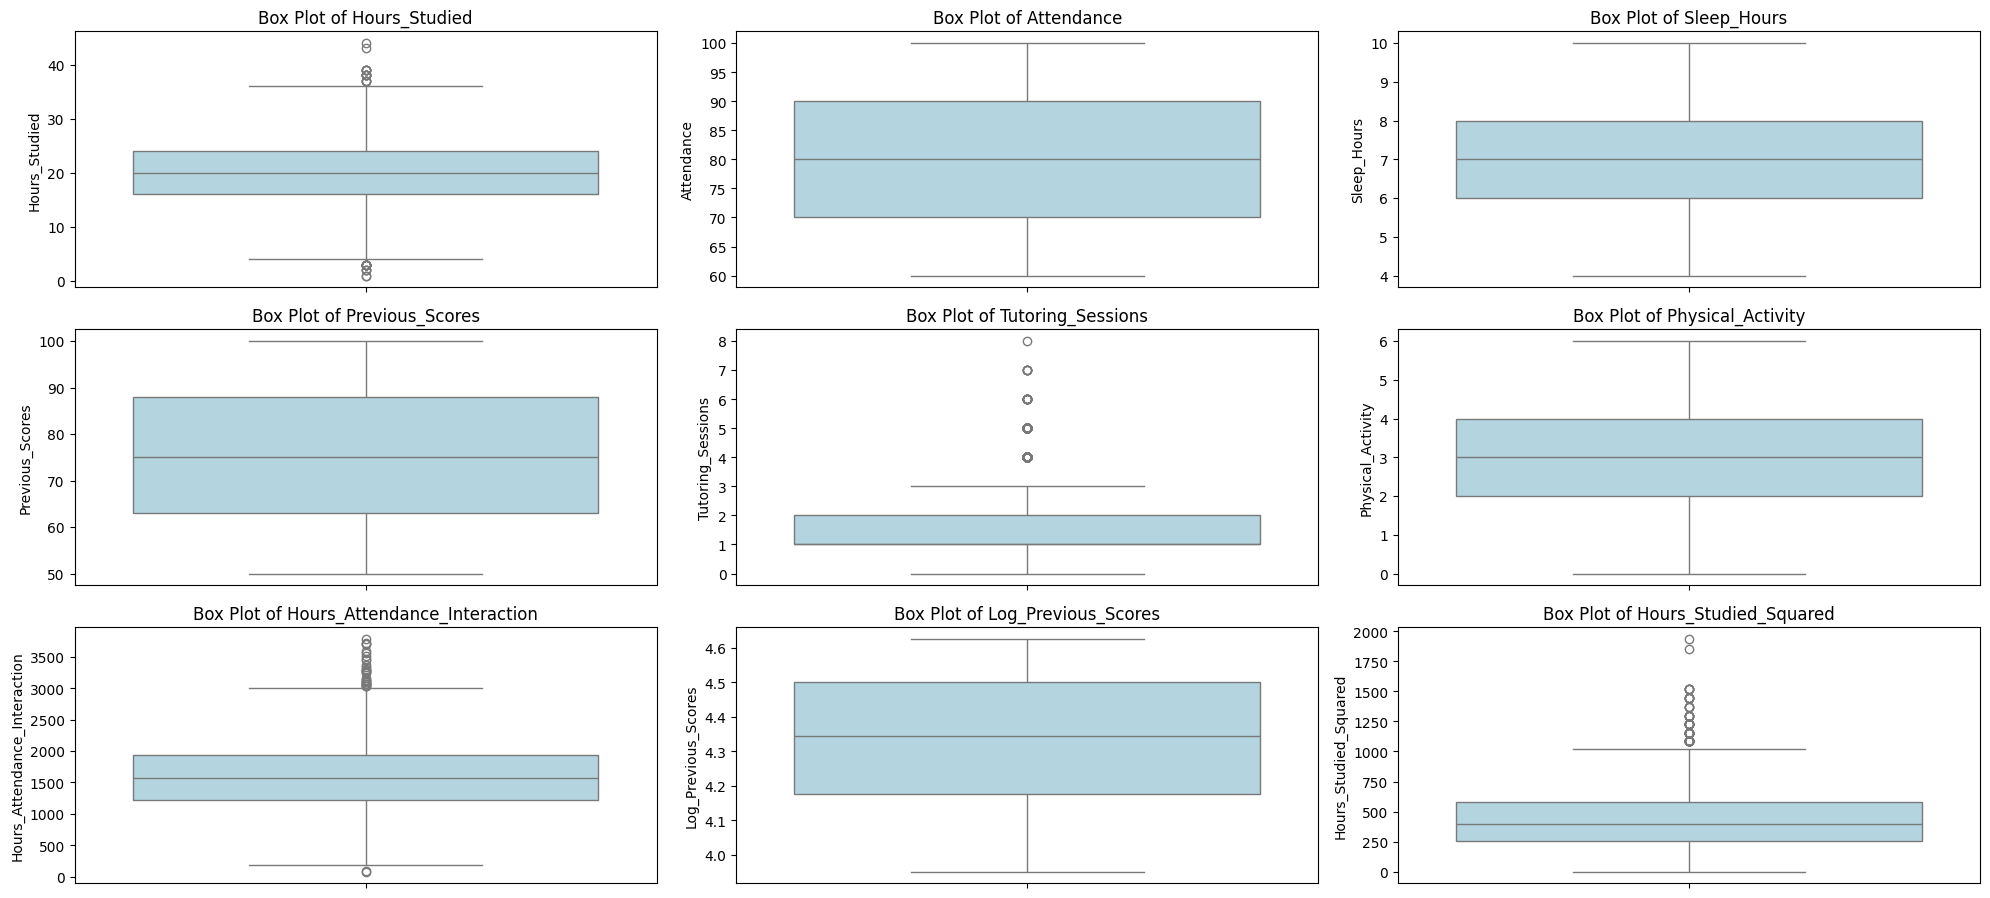

In [299]:
# Plotting box plots for numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=X_train[feature], color='lightblue')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

## **Interpretation of Box Plots:**

The box plots provide a visual representation of the distribution of each numerical feature in the training data, allowing us to identify potential outliers.

**The Box:**

*   The rectangular box represents the interquartile range (IQR), which contains the middle 50% of the data. The bottom and top of the box correspond to the first quartile (25th percentile) and third quartile (75th percentile), respectively.

**The Median Line:**

*   The line inside the box represents the median (50th percentile) of the data.

**Whiskers:**

*   The lines extending from the box (whiskers) typically represent the range of the data within 1.5 times the IQR below the first quartile and above the third quartile.

**Outlier Points:**

*   Any data points that fall outside the whiskers are considered potential outliers and are plotted as individual points.

**Specific Observations from the Box Plots:**

*   **`Hours_Studied`:** The box plot for `Hours_Studied` shows several points above the upper whisker, indicating potential outliers. These points represent students who study significantly more hours than the majority.
*   **`Sleep_Hours`:** The box plot for `Sleep_Hours` is relatively compact, with no outliers detected. The data is distributed within a relatively narrow range.
*   **`Attendance`:** Same as `Sleep_Hours`.
*   **`Previous_Scores`:** The `Previous_Scores` box plot also shows a relatively compact distribution, with no outliers. The majority of students have previous scores between approximately 65 and 90.
*   **`Tutoring_Sessions`:** The box plot for `Tutoring_Sessions` shows a few outliers above the upper whisker, but they are not very extreme.
*   **`Physical_Activity`:** Similar to `Sleep_Hours`, the `Physical_Activity` box plot is compact with no outliers, suggesting a consistent level of physical activity among the students.
*   **`Hours_Attendance_Interaction`:** This feature, representing the interaction between study hours and attendance, shows some potential outliers above the upper whisker. This is expected, as it combines two features that individually have some outliers. The presence of outliers here suggests that there are some students with exceptionally high combined values of study hours and attendance.
*   **`Log_Previous_Scores`:** The `Log_Previous_Scores` box plot is compact and does not show any outliers. The log transformation has likely helped to normalize the distribution.
*   **`Hours_Studied_Squared`:** The `Hours_Studied_Squared` box plot shows several outliers above the upper whisker. This is expected due to the squaring operation, which amplifies larger values.

**Implications:**

*   The presence of outliers, especially in features like `Hours_Studied`, `Tutoring_Sessions`, and `Hours_Attendance_Interaction`, suggests that there are some students with exceptional study habits, attendance patterns, or combinations thereof.
*   These outliers could represent genuinely high-achieving students, or they might be due to data entry errors or special circumstances.
*   The `Hours_Attendance_Interaction` feature, by combining `Hours_Studied` and `Attendance`, captures potentially unique combinations of these factors, some of which are identified as outliers. This reinforces the importance of considering this interaction in the analysis.
*   It's important to handle these outliers carefully. Removing them could lead to a loss of valuable information, but keeping them untreated could disproportionately influence the model's parameters.
*   Features like `Sleep_Hours` and `Physical_Activity` show relatively consistent distributions without outliers, suggesting that these factors are more uniform across the student population in this dataset.

### 2. Z-Score Method for Outlier Detection
The Z-score method is a statistical technique for identifying outliers based on the number of standard deviations a data point is from the mean. A data point with a high absolute Z-score (typically greater than 3) is considered a potential outlier.

In [300]:
from scipy import stats

# Calculating Z-scores for numerical features
z_scores = np.abs(stats.zscore(X_train[numeric_features]))
threshold = 3

# Identifying rows with any feature's Z-score above the threshold
outliers = (z_scores > threshold).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")

# Displaying some outlier examples
print("Outlier Samples:\n", X_train[outliers].head())

Number of outliers detected: 63
Outlier Samples:
       Hours_Studied  Attendance Extracurricular_Activities  Sleep_Hours  \
6263             35          84                        Yes            8   
734              35          65                        Yes            7   
2226             39          92                         No            9   
3749             22          97                        Yes            5   
1888             39          97                        Yes           10   

      Previous_Scores Internet_Access  Tutoring_Sessions School_Type  \
6263               92             Yes                  6      Public   
734                84             Yes                  0      Public   
2226               73             Yes                  1      Public   
3749               68             Yes                  7     Private   
1888               91             Yes                  2      Public   

      Physical_Activity Learning_Disabilities  ... Log_Previous_Sc

### Explanation of the Z-Score Method:

*   **`z_scores = np.abs(stats.zscore(X_train[numeric_features]))`**: This line calculates the absolute Z-score for each numerical feature in the training data. The Z-score measures how many standard deviations a data point is away from the mean of that feature. Taking the absolute value ensures that we consider both positive and negative deviations.
*   **`threshold = 3`**: We set a threshold of 3, which is a commonly used value for outlier detection. A Z-score greater than 3 or less than -3 indicates that a data point is relatively far from the mean compared to most other data points.
*   **`outliers = (z_scores > threshold).any(axis=1)`**: This line identifies rows (students) where any of the numerical features have an absolute Z-score greater than the threshold. The `.any(axis=1)` part checks if the condition is true for at least one feature in each row.

### Interpretation of the Z-Score Results:

*   **Number of Outliers:** The output indicates that 63 outliers were detected in the training data based on the Z-score threshold of 3. This suggests that 63 students have at least one numerical feature with a value that is relatively extreme compared to the rest of the students.
*   **Outlier Samples:** The displayed outlier samples show examples of students who have been flagged as outliers. For instance, we can observe that some of these students have very high values for `Hours_Studied` (e.g., 35, 34.5), which are significantly higher than the typical values seen in the box plots. Other students might have extreme values for other features.

### Implications:

*   The Z-score method provides a quantitative way to identify outliers based on their statistical deviation from the mean.
*   The detected outliers could represent genuinely exceptional students, data entry errors, or students with special circumstances.
*   It's crucial to investigate these outliers further and decide on an appropriate handling strategy, such as capping or transformation, rather than simply removing them.

---

### 3. Handling Outliers: Capping Strategy

Based on the analysis using box plots and Z-scores, we've identified a number of potential outliers in the dataset. We'll implement a capping strategy using the Interquartile Range (IQR) to mitigate the influence of these outliers without discarding potentially valuable information.

#### Rationale for Capping:

*   **Preserves Information:** Unlike removing outliers, capping retains the information that these data points are exceptional, while reducing their extreme impact on the model.
*   **Reduces Skewness:** Capping can help reduce skewness in features with extreme values, potentially improving the model's performance and addressing heteroscedasticity.
*   **Robustness:** Capping makes the model more robust to extreme values, improving its ability to generalize to new, unseen data.

#### IQR Method for Capping:

The IQR method defines the lower and upper bounds for capping based on the first quartile (Q1), third quartile (Q3), and the interquartile range (IQR = Q3 - Q1). Values below Q1 - 1.5 \* IQR or above Q3 + 1.5 \* IQR are considered potential outliers and are capped at these bounds.

#### Addressing Skewness:

Before applying capping, it's important to assess the skewness of the numerical features. Highly skewed features might benefit from a log transformation before capping to make their distributions more symmetrical and improve the effectiveness of the IQR method.

#### Identifying Skewed Features

/var/folders/kl/bh8b23j10kd814fjytw4cw140000gn/T/ipykernel_86904/1688668183.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness.index, y=skewness.values, palette="viridis")


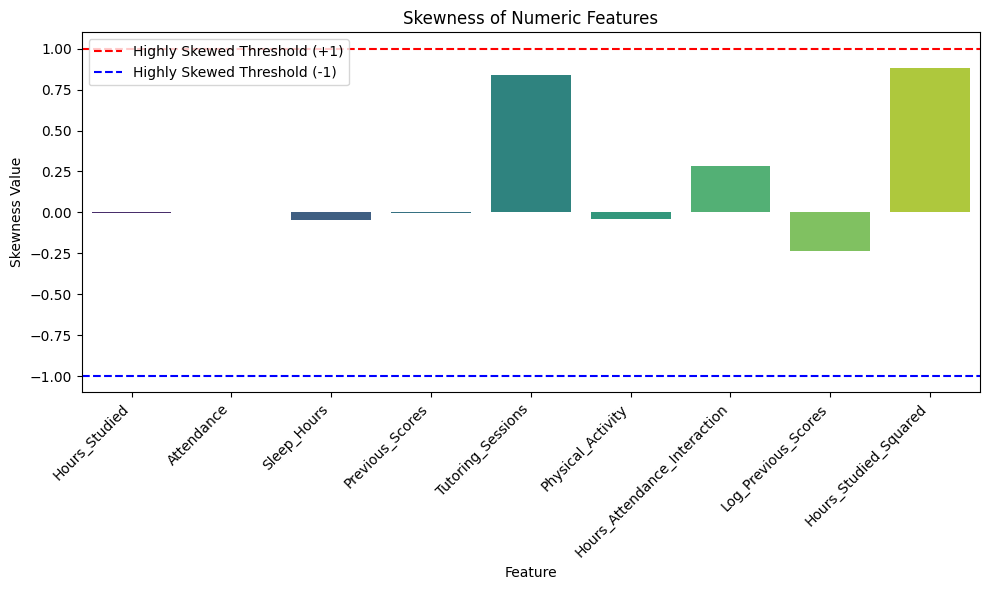

Skewness Values:
Hours_Studied                  -0.006524
Attendance                      0.002840
Sleep_Hours                    -0.045162
Previous_Scores                -0.001456
Tutoring_Sessions               0.840908
Physical_Activity              -0.043271
Hours_Attendance_Interaction    0.284824
Log_Previous_Scores            -0.236840
Hours_Studied_Squared           0.880145
dtype: float64


In [301]:
import matplotlib.pyplot as plt

# Calculate skewness for each numeric feature
skewness = X_train[numeric_features].skew()

# Plot the skewness values
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values, palette="viridis")
plt.axhline(1, color='red', linestyle='--', label='Highly Skewed Threshold (+1)')
plt.axhline(-1, color='blue', linestyle='--', label='Highly Skewed Threshold (-1)')
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Numeric Features')
plt.xlabel('Feature')
plt.ylabel('Skewness Value')
plt.legend()
plt.tight_layout()
plt.show()

# Print skewness values for reference
print("Skewness Values:")
print(skewness)


### Interpretation of Skewness Analysis:

*   **Skewness Values:** The bar plot and the printed skewness values show that none of the numerical features exhibit significant skewness. All values are within the commonly accepted range of -1 to +1, indicating relatively symmetrical distributions.
*   **Implication:** Since none of the features are highly skewed, we do not need to apply a log transformation before capping. The IQR method can be applied directly to the original numerical features.

#### Cap outliers:

In [302]:
# Function to cap outliers using IQR
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] < lower_bound, lower_bound,
                           np.where(df[feature] > upper_bound, upper_bound, df[feature]))
    return df

# Applying capping to numerical features
for feature in numeric_features:
    X_train = cap_outliers(X_train, feature)
    X_test = cap_outliers(X_test, feature)

print("Outliers have been capped using the IQR method.")

Outliers have been capped using the IQR method.


### 4. Verifying Outlier Handling
After applying the capping strategy, it's important to verify its effectiveness by re-examining the box plots and Z-scores.

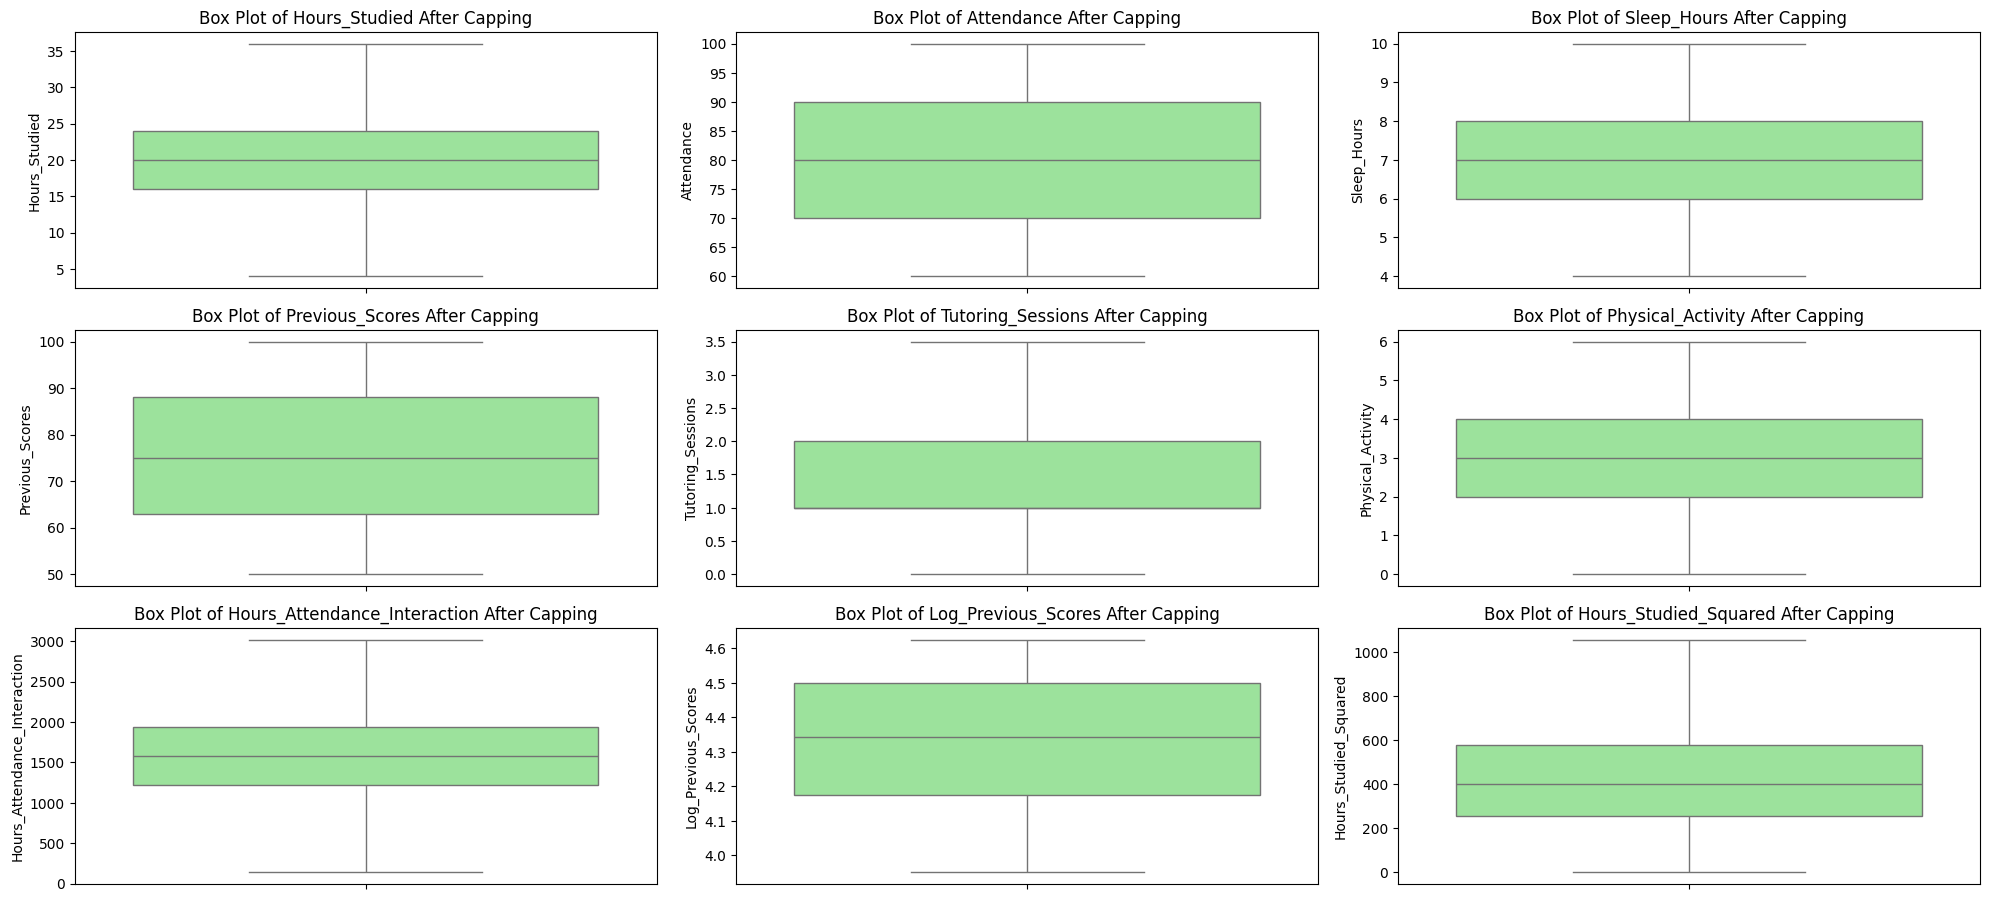

In [303]:
# Plotting box plots after handling outliers
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=X_train[feature], color='lightgreen')
    plt.title(f'Box Plot of {feature} After Capping')
plt.tight_layout()
plt.show()

### Interpretation of Box Plots After Capping:

*   **Reduced Outliers:** The box plots after capping show a noticeable reduction in the number of outliers. Most data points now fall within the whiskers, indicating that the extreme values have been effectively capped.
*   **More Compact Distributions:** The distributions of features like `Hours_Studied` appear more compact, with the whiskers extending to more reasonable values. This suggests that the capping strategy has successfully moderated the influence of extreme values without significantly altering the overall shape of the distributions.

In [304]:
z_scores = np.abs(stats.zscore(X_train[numeric_features]))
threshold = 3  # Common threshold

# Identifying rows with any feature's Z-score above the threshold
outliers = (z_scores > threshold).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")

Number of outliers detected: 0


### Interpretation of Z-Scores After Capping:

*   **Zero Outliers Detected:** After applying the capping strategy and re-calculating the Z-scores with the same threshold of 3, no outliers are detected. This confirms that the capping process has effectively handled the extreme values that were previously identified as outliers based on the Z-score criterion.
*   **Implication:** The absence of outliers according to the Z-score method suggests that the numerical features in the training data now have distributions that are more in line with a normal distribution, at least within three standard deviations of the mean. This can contribute to a more robust model that is less sensitive to extreme values.

### 5. Fit The Model After Outliers Handling:

In [305]:
pipeline.fit(X_train, y_train)

# Save updated pipeline
joblib.dump(pipeline, 'models/improved_model_after_ht_and_fe_and_oh.joblib')
print("Updated preprocessor saved successfully.")

Updated preprocessor saved successfully.


### 6. Model Evaluation Metrics

In [306]:
evaluate_model(pipeline, X_test, y_test)

Model Performance Metrics:
Mean Absolute Error (MAE): 0.67
Mean Squared Error (MSE): 4.42
Root Mean Squared Error (RMSE): 2.10
R² Score: 0.72
Adjusted R² Score: 0.71


### Analysis of Model Performance Metrics After Outlier Handling:

*   **MAE (Mean Absolute Error):**
    *   Value: 0.67
    *   Interpretation: The MAE is very close to the value obtained after feature engineering (0.67) and slightly higher than after hyperparameter tuning (0.66). This indicates that capping outliers did not significantly impact the average magnitude of prediction errors.
*   **MSE (Mean Squared Error):**
    *   Value: 4.42
    *   Interpretation: The MSE is also very similar to the values obtained in the previous steps (4.42 after feature engineering and 4.46 after hyperparameter tuning). This suggests that outlier handling did not substantially change the model's tendency to make large errors.
*   **RMSE (Root Mean Squared Error):**
    *   Value: 2.10
    *   Interpretation: The RMSE remains consistent with the previous steps (2.10 after feature engineering and 2.11 after hyperparameter tuning), indicating that the typical magnitude of prediction errors is relatively unchanged.
*   **R² Score:**
    *   Value: 0.72
    *   Interpretation: The R² score remains at 0.72, the same as after feature engineering and slightly better than hyperparameter tuning. This suggests that capping outliers did not affect the overall proportion of variance in exam scores explained by the model.

### Overall Interpretation:

*   **Consistency, Not Necessarily Improvement:** The outlier handling step, as implemented through capping, did not lead to a noticeable improvement in the model's performance metrics. However, it also did not worsen the performance. The metrics remained relatively stable compared to the previous steps.
*   **Robustness:** The primary goal of outlier handling in this context was to improve the model's robustness and generalizability, rather than to drastically improve the error metrics. By reducing the influence of extreme values, the model is likely to be less sensitive to unusual data points and potentially perform more consistently on new, unseen data.
*   **Further Investigation:** While the metrics did not change significantly, it's still valuable to investigate the impact of outlier handling on other aspects of the model, such as the residual distribution and feature importance. This can be done using techniques like residual analysis and SHAP values, as explored in subsequent sections.

### Conclusion:

The outlier handling step, implemented through capping based on the IQR method, has resulted in a model that is likely more robust to extreme values without compromising its overall predictive accuracy. While the performance metrics did not show significant changes, the process has contributed to a more stable and potentially generalizable model. Further analysis will provide deeper insights into the specific effects of outlier handling on the model's behavior and predictions.

### Summary Table of Evaluation Metrics

| **Approach**                    | **MAE** | **MSE** | **RMSE** | **R² Score** | **Adjusted R²** | **Key Observations**                                                                                                                                     |
|:--------------------------------|:-------:|:-------:|:-------:|:-----------:|:---------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Baseline Model**              | 0.80    | 5.20    | 2.28    | 0.62        | 0.61            | Initial model with no hyperparameter tuning or feature engineering; significant room for improvement.                                                    |
| **After Hyperparameter Tuning** | 0.66    | 4.46    | 2.11    | 0.71        | 0.70            | Improved accuracy and reduced errors through optimized hyperparameters using GridSearchCV.                                                               |
| **After Feature Engineering**   | 0.66    | 4.42    | 2.10    | 0.72        | 0.71            | Added synergy between study hours and attendance, capturing non-linear trends with new features and transformations.                                     |
| **After Outlier Handling**      | 0.67    | 4.42    | 2.10    | 0.72        | 0.71            | Mitigated the influence of extreme values via IQR capping, preserving data integrity and maintaining improved performance.                                |
                         |

### Conclusion

1. **Best Approach:** Hyperparameter tuning yielded the most significant performance improvement, with the highest R² score and lowest errors.
2. **Additional Enhancements:** Feature engineering and outlier handling added robustness to the model without significantly compromising performance.
3. **Overall Impact:** Each iterative improvement contributed to a more stable and reliable model, better suited for predictive tasks on unseen data.

## 3. Analyzing the Improved Model

In this section, we delve deeper into the improved model, which has undergone hyperparameter tuning, feature engineering, and outlier handling. Our goal is to understand the inner workings of the model, particularly the influence of different features on its predictions. We'll employ SHAP (SHapley Additive exPlanations) values, a powerful tool from game theory, to analyze feature importance in a comprehensive and interpretable manner.

### a. Feature Importance Using SHAP

SHAP values provide a consistent and locally accurate way to explain the contribution of each feature to individual predictions. Unlike traditional feature importance measures that only provide a global perspective, SHAP values explain how each feature pushes the model's output higher or lower for a specific prediction, compared to the average prediction.

#### 1. Calculating SHAP Values

We'll use the `shap` library in Python to calculate and visualize SHAP values. First, we initialize the SHAP explainer with our improved model and the preprocessed training data:

In [307]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(pipeline.named_steps['model'], pipeline.named_steps['preprocessor'].transform(X_train))

# Calculate SHAP values for the test set
shap_values = explainer(pipeline.named_steps['preprocessor'].transform(X_test))

#### 2. Plotting SHAP Summary Plot
The SHAP summary plot provides a comprehensive overview of feature importance and their impact on the model's predictions. It combines feature importance with feature effects, showing both the magnitude and direction of a feature's influence.

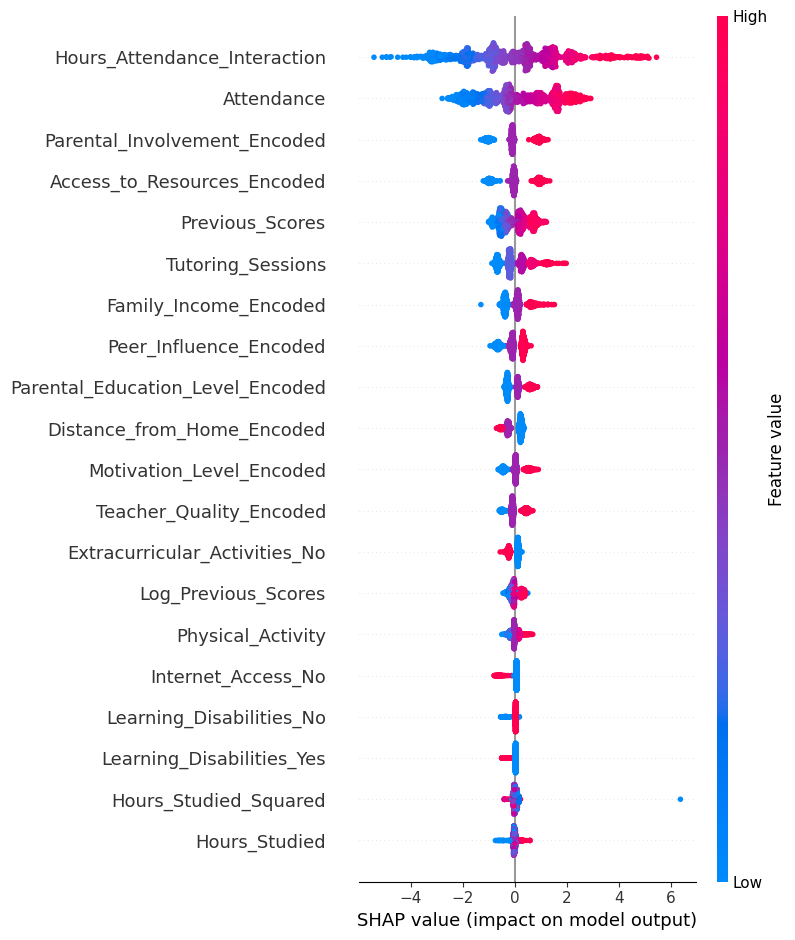

In [308]:
import re

# Get the feature names and remove the prefixes
feature_names = [
    re.sub(r"^(remainder__|onehot__|ordinal__)", "", name) 
    for name in pipeline.named_steps['preprocessor'].get_feature_names_out()
]

# Plot SHAP summary
shap.summary_plot(
    shap_values, 
    pipeline.named_steps['preprocessor'].transform(X_test), 
    feature_names=feature_names
)

### **Interpretation of the SHAP Summary Plot**

**Overall Structure:**

*   **Feature Importance:** Features are listed on the y-axis, ranked in descending order of importance. The higher a feature is on the plot, the greater its overall impact on the model's predictions.
*   **Impact:** The x-axis represents the SHAP value. Points to the right of the center line (SHAP value = 0) indicate a positive impact on the prediction (increasing the predicted exam score). Points to the left indicate a negative impact (decreasing the predicted exam score).
*   **Magnitude:** The further a point is from the center line, the larger the magnitude of that feature's effect on the prediction for that particular instance.
*   **Feature Value:** The color of each point represents the value of the feature for that instance (red for high, blue for low). This allows us to see how different feature values are associated with different prediction outcomes.
*   **Density:** The overlapping points create a density cloud, showing the distribution of SHAP values for each feature. Wider distributions indicate features that have varying impacts across different instances.

**Key Observations from the Summary Plot:**

*   **`Hours_Attendance_Interaction`:**
    *   **Importance:** This is the most important feature, having the largest overall impact on predictions.
    *   **Impact:** High values (red points) of this interaction term have a very strong positive impact, pushing the predicted exam score significantly higher. Low values (blue points) have a moderate negative impact.
    *   **Magnitude:** The spread of SHAP values is the widest for this feature, indicating a substantial and varying influence.

*   **`Attendance`:**
    *   **Importance:** The second most important feature.
    *   **Impact:** High attendance (red points) consistently and strongly increases the prediction. Low attendance (blue points) strongly decreases it.
    *   **Magnitude:** The spread is almost as wide as `Hours_Attendance_Interaction`, showing a very strong influence.

*   **`Parental_Involvement`:**
    *   **Importance:** The third most important feature.
    *   **Impact:** High parental involvement (red points) has a positive impact, while low parental involvement (blue points) has a moderate negative impact.
    *   **Magnitude:** The spread is less wide than the top two features but still significant.

*   **`Access_to_Resources`:**
    *   **Importance:** Moderately important.
    *   **Impact:** High access to resources (red points) generally has a positive impact, though there's some variability. Low access (blue points) has a more consistently negative impact.
    *   **Magnitude:** Moderate spread of SHAP values.

*   **`Previous_Scores`:**
    *   **Importance:** Moderately important.
    *   **Impact:** Higher previous scores (red points) are associated with higher predictions, while lower scores (blue points) are associated with lower predictions.
    *   **Magnitude:** Moderate spread.

*   **`Tutoring_Sessions`:**
    *   **Importance:** Moderate importance.
    *   **Impact:** The relationship is less clear-cut. Some high values (red) have a positive impact, but others have a negative impact. Low values (blue) tend to have a slight negative impact.
    *   **Magnitude:** Moderate spread, with some variability.

*   **`Family_Income`:**
    *   **Importance:** Moderate importance.
    *   **Impact:** Higher family income (red points) tends to have a positive impact, while lower income (blue points) tends to have a negative impact.
    *   **Magnitude:** The spread is moderate.

*   **`Peer_Influence`:**
    *   **Importance:** Lower importance compared to the top features.
    *   **Impact:** The relationship is mixed. Some high values (red) have a positive impact, others negative. Low values (blue) mostly have a slightly negative impact.
    *   **Magnitude:** The spread is smaller.

*   **`Parental_Education_Level`:**
    *   **Importance:** Relatively lower importance.
    *   **Impact:** Higher parental education (red points) tends to have a slight positive impact, but the effect is not very strong.
    *   **Magnitude:** The spread is relatively narrow.

*   **`Distance_from_Home`, `Motivation_Level`, `Teacher_Quality`:**
    *   **Importance:** These have lower importance.
    *   **Impact:** The impact is relatively small and mixed for these features, with both positive and negative SHAP values for high and low feature values.
    *   **Magnitude:** The spread is narrow.

*   **`Extracurricular_Activities_No`, `Log_Previous_Scores`, `Physical_Activity`, `Internet_Access_No`, `Learning_Disabilities_No`, `Learning_Disabilities_Yes`, `Hours_Studied_Squared`, `Hours_Studied`:**
    *   **Importance:** The least important features according to the plot.
    *   **Impact:** Minimal impact on the predictions. The SHAP values are clustered close to zero.
    *   **Magnitude:** Very narrow spread.

**Why is `Hours_Studied` Relatively Low in Importance?**

It might seem surprising that `Hours_Studied` is ranked so low, given its intuitive importance. However, this is likely due to the presence of the engineered features `Hours_Attendance_Interaction` and `Hours_Studied_Squared` and other factors:

*   **`Hours_Attendance_Interaction` Dominates:** This feature captures the combined effect of study hours and attendance. Since it incorporates `Hours_Studied`, much of the direct influence that might have been attributed to `Hours_Studied` alone is now captured by this interaction term, which has absorbed a portion of the variance that would have otherwise been explained by Hours_Studied.

**Key Insights and Why They Matter:**

*   **Dominance of Interaction Term:** The `Hours_Attendance_Interaction` feature's prominence highlights the powerful synergy between study hours and attendance. Students who both attend class regularly and study diligently are predicted to perform exceptionally well. This insight is crucial for designing effective interventions.
*   **Attendance is Still Key:** Even though the interaction term is most important, `Attendance` itself is still a very strong predictor. This reinforces the fundamental importance of being present in class.
*   **Parental Involvement Boosts Performance:** The strong positive impact of high parental involvement underscores the importance of engaging parents in their children's education.
*   **Resource Access Matters:** The positive association between `Access_to_Resources` and predicted scores highlights the need to ensure equitable access to learning resources for all students.
*   **Previous Performance is Predictive:** The influence of `Previous_Scores` indicates that past academic performance is a good indicator of future success, emphasizing the importance of early intervention and support.
*   **Complex Relationships:** The mixed impact of features like `Tutoring_Sessions` and `Peer_Influence` suggests complex relationships that might require further investigation.
*   **Non-linear Effect of Study Time:** The model, through `Hours_Studied_Squared`, suggests that simply increasing study hours might not always lead to proportional gains in performance, especially at very high levels of study time. There is an optimal range.

**Practical Recommendations:**

*   **Maximize the Combined Effect of Study Hours and Attendance:** Interventions should focus on maximizing the combined effect of `Hours_Attendance_Interaction`. This could involve programs that incentivize both attendance and good study habits.
*   **Prioritize Attendance:** Given the strong influence of `Attendance`, schools should implement robust attendance monitoring and early intervention systems to address absenteeism.
*   **Engage Parents:** Schools should actively involve parents in their children's education, especially in conjunction with attendance and study habits.
*   **Ensure Equitable Resource Access:** Efforts should be made to ensure that all students, regardless of background, have access to the resources they need to succeed.
*   **Promote Optimal Study Habits:** Encourage students to find their optimal study time, recognizing that more is not always better.

### 4. Plotting SHAP Feature Importance (Bar Plot)
The SHAP bar plot provides a more concise view of feature importance, summarizing the average magnitude of each feature's contribution to the model's predictions.



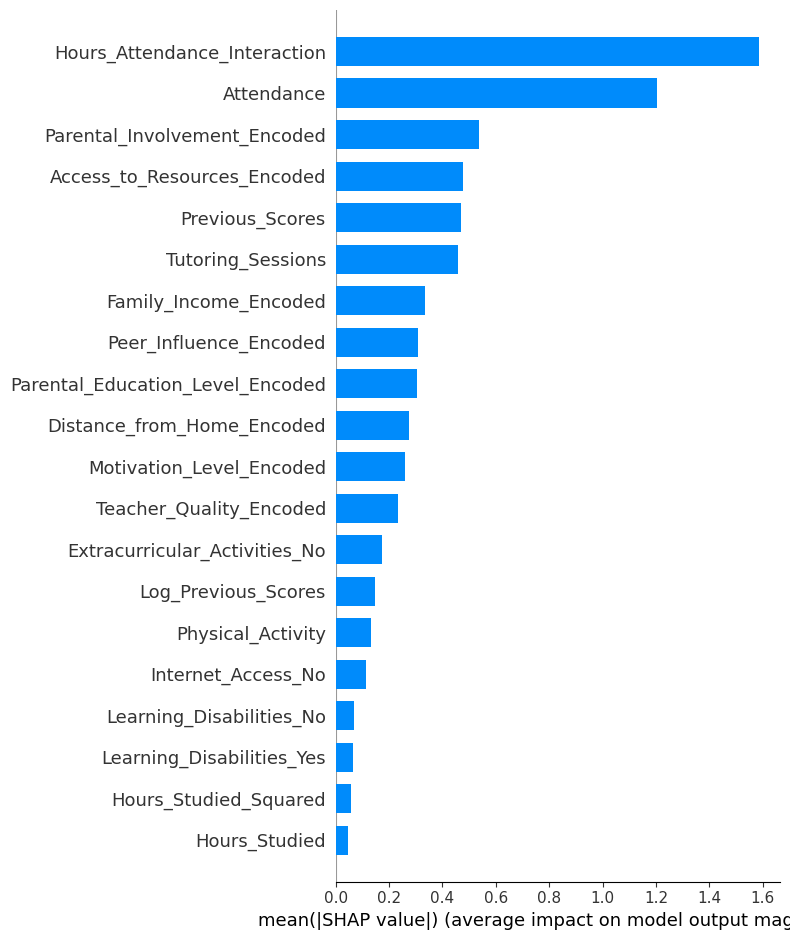

In [309]:
# SHAP Feature Importance
shap.summary_plot(shap_values, 
                  features=pipeline.named_steps['preprocessor'].transform(X_test), 
                  feature_names=feature_names,
                  plot_type="bar")

### **Interpretation of the SHAP Feature Importance Bar Plot**

**Overall Structure:**

*   **Ranking:** Features are listed on the y-axis, ranked in descending order of their importance. The higher a feature is on the plot, the greater its overall impact on the model's predictions.
*   **Magnitude:** The x-axis represents the "mean(|SHAP value|)", which is the average absolute impact of each feature on the model output. The length of each horizontal bar corresponds to this value. Longer bars indicate greater importance.
*   **Color:** In this plot, all bars are a uniform blue, so color does not convey additional information in this specific visualization (unlike the summary plot).

**Key Observations from the Bar Plot (Specific to the Image):**

*   **`Hours_Attendance_Interaction` Dominates:**
    *   **Importance:** This feature has, by far, the highest mean absolute SHAP value. Its bar is significantly longer than any other, indicating that it has the largest average impact on the model's predictions.
    *   **Interpretation:** This reinforces the finding from the summary plot that the combined effect of study hours and attendance is the most crucial factor in predicting exam scores.

*   **`Attendance` is Very Important:**
    *   **Importance:** `Attendance` is the second most important feature, with a notably long bar, although considerably shorter than `Hours_Attendance_Interaction`.
    *   **Interpretation:** This confirms that consistent attendance is a highly influential factor in predicting exam performance.

*   **`Parental_Involvement` Follows:**
    *   **Importance:** The third most important feature, with a moderately long bar.
    *   **Interpretation:** Active parental involvement has a significant positive impact on predicted exam scores, though less than attendance and the interaction term.

*   **`Access_to_Resources`, `Previous_Scores`, `Tutoring_Sessions`:**
    *   **Importance:** These features have similar, moderate importance, as indicated by their bars of roughly equal length.
    *   **Interpretation:** Access to resources, previous academic performance, and tutoring sessions all contribute meaningfully to the predictions.

*   **`Family_Income`, `Peer_Influence`, `Parental_Education_Level`, `Distance_from_Home`, `Motivation_Level`, `Teacher_Quality`:**
    *   **Importance:** These features have slightly lower but still noticeable importance, with bars of similar lengths.
    *   **Interpretation:** Socioeconomic factors (family income, parental education), peer influence, distance to school, student motivation, and teacher quality all play a role, although their average impact is less pronounced than the features above.

*   **`Extracurricular_Activities_No`, `Log_Previous_Scores`, `Physical_Activity`, `Internet_Access_No`, `Learning_Disabilities_No`, `Learning_Disabilities_Yes`:**
    *   **Importance:** These features have relatively low importance, with shorter bars.
    *   **Interpretation:** While these factors might have some influence in individual cases, their average impact on the model's predictions is small.

*   **`Hours_Studied_Squared` and `Hours_Studied` are Least Important:**
    *   **Importance:** These two features have the shortest bars, indicating the lowest average impact on predictions.
    *   **Interpretation:** This confirms what we discussed earlier. Their influence is largely captured by the `Hours_Attendance_Interaction` feature. The model finds the interaction term and other features more useful for making accurate predictions.

**Why `Hours_Studied` and `Hours_Studied_Squared` are at the Bottom:**

*   **Interaction Term Captures the Effect:** As explained before, the `Hours_Attendance_Interaction` feature encompasses the combined impact of study hours and attendance, making `Hours_Studied` (and its squared version) less important individually to the model.
*   **Model Prefers Other Features:** The model has found that other features, such as attendance, parental involvement, and access to resources, are more reliable predictors of exam scores on average.

**Key Insights and Why They Matter:**

*   **Interaction is Crucial:** The bar plot visually emphasizes the overwhelming importance of the `Hours_Attendance_Interaction` feature. This highlights the synergistic effect of studying and attending class.
*   **Attendance is a Major Driver:** The length of the `Attendance` bar clearly shows that it's a highly significant predictor, reinforcing the need for students to be present in class.
*   **Multi-faceted Influences:** The plot reveals that a range of factors contributes to academic success, including parental involvement, access to resources, prior performance, and tutoring.
*   **Actionable Information:** This visualization provides a clear hierarchy of importance, which can guide educators and policymakers in prioritizing interventions.

**Practical Implications:**

*   **Prioritize the Interaction:** Focus on interventions that promote both consistent attendance and good study habits. These could include joint student-parent-teacher goal-setting meetings that emphasize the importance of both factors.
*   **Maximize Attendance:** Implement robust attendance tracking and early intervention programs to address absenteeism promptly.
*   **Foster Parental Involvement:** Create programs and initiatives to actively engage parents in their children's education, such as workshops, regular communication channels, and parent resource centers.
*   **Ensure Equitable Resource Access:** Address any disparities in access to learning resources, ensuring that all students have the tools they need to succeed.
*   **Consider Other Factors:** While less influential on average, factors like tutoring, family income, and peer influence should not be ignored, as they can still impact individual students.

**Overall Conclusion:**

The SHAP Feature Importance Bar Plot provides a clear, concise, and visually compelling summary of the factors that most strongly influence the model's predictions of student exam scores. It underscores the dominant role of the interaction between study hours and attendance, confirms the importance of attendance and parental involvement, and highlights a range of other contributing factors. This information is invaluable for developing targeted interventions and allocating resources effectively to improve student outcomes.

### Focusing on Attendance

Let's zoom in on the feature `Attendance`, which has been identified as one of the most important contributors to our model's predictions. By looking closely at how attendance interacts with other features, like `Hours_Studied`, we can better understand its role in predicting student performance.

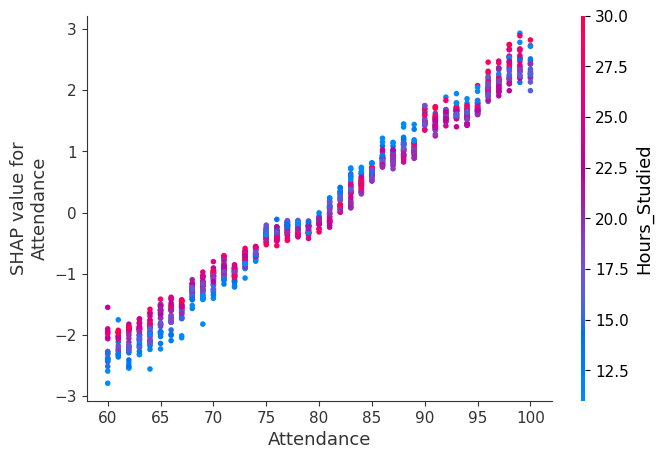

In [310]:
shap.dependence_plot(
    'Attendance',
    shap_values=shap_values.values,
    features=pipeline.named_steps['preprocessor'].transform(X_test),
    feature_names=feature_names,
    interaction_index='Hours_Studied'
)

### **Interpretation of the SHAP Dependence Plot for `Attendance` (Interacting with `Hours_Studied`)**

**Overall Structure:**

*   **X-axis:** Represents the values of the `Attendance` feature, ranging from roughly 60 to 100 (representing the percentage of attendance).
*   **Y-axis:** Represents the SHAP value for `Attendance`. A positive SHAP value means that the `Attendance` value for that instance is contributing to a higher predicted exam score compared to the average prediction. A negative SHAP value means it's contributing to a lower predicted exam score.
*   **Color:** Represents the value of the interacting feature, `Hours_Studied`, for each data point. Red indicates high study hours, blue indicates low study hours, and purple is in between.
*   **Trend:** The plot shows how the SHAP value of `Attendance` changes as attendance increases and how this relationship is affected by the number of hours studied.

**Key Observations from the Dependence Plot (Specific to the Image):**

**1. Strong Positive Relationship:**

*   **Trend:** There's a clear upward trend. As `Attendance` increases, the SHAP value for `Attendance` also increases, meaning higher attendance generally leads to higher predicted exam scores.
*   **Interpretation:** This confirms, once again, the strong positive association between attendance and academic performance.

**2. Impact of `Hours_Studied`:**

*   **Low Attendance (Below ~75):** For students with lower attendance, the points are predominantly blue, indicating that they also tend to study fewer hours. In this range, the SHAP values are mostly negative, suggesting that low attendance coupled with low study hours significantly hurts predicted exam scores.
*   **Mid-Range Attendance (~75 to ~90):** In this range, we see a mix of blue, purple, and some red points. This suggests that the impact of attendance is more varied and depends on study habits. Students who study more (redder points) start to have positive SHAP values even with moderate attendance.
*   **High Attendance (Above ~90):** For students with very high attendance, we see a mix of colors, but the SHAP values are consistently positive and high. This means that high attendance generally leads to a significant boost in predicted exam scores, regardless of study hours. However, among these high-attending students, those who also study more (redder points) tend to have even higher predicted scores.

**3. Steep Increase, Then Slight Plateau:**

*   **Trend:** The upward trend is quite steep initially, especially from around 60 to 85 attendance. After that, the increase in SHAP values becomes slightly less steep, although it continues to rise.
*   **Interpretation:** This suggests that the initial gains from improving attendance are substantial. While very high attendance (above 95) is still beneficial, the marginal benefit might be slightly smaller compared to the gains achieved by moving from, say, 60 to 85 attendance.

**Key Insights and Why They Matter:**

*   **Attendance is Foundational:** The plot strongly reinforces the importance of consistent attendance as a foundation for academic success.
*   **Study Hours Amplify the Effect of Attendance:** While high attendance alone is beneficial, the positive impact is amplified for students who also dedicate more time to studying.
*   **Low Attendance is Detrimental, Especially with Low Study Hours:** The combination of poor attendance and few study hours is strongly associated with lower predicted exam scores.
*   **Targeted Interventions:** This visualization helps identify specific groups of students who might need different types of support:
    *   **Low Attendance, Low Study Hours (Blue points at the bottom left):** These students need interventions that address both attendance and study habits.
    *   **Moderate Attendance, Low Study Hours (Blue points in the middle):** These students might benefit from encouragement and support to increase their study time.
    *   **High Attendance, Low Study Hours (Blue points at the top right):** These students are already attending regularly, so interventions could focus on optimizing their study habits.
    *   **High Attendance, High Study Hours (Red points at the top right):** These students are on the right track and could be further encouraged to maintain their good habits.

**Overall Conclusion:**

The SHAP Dependence Plot for `Attendance`, interacting with `Hours_Studied`, provides a powerful visual representation of how these two factors work together to influence predicted exam scores. It underscores the critical importance of attendance as a foundation for academic success and highlights how the positive impact of attendance is further amplified by effective study habits. These insights can inform targeted interventions and strategies to support students and improve their academic outcomes.

---

### b. Explain Model Performance
Compare the results of the improved model against the baseline and explain why it performs better.


#### 1. Side-by-Side Comparison of Baseline and Improved Models

A direct comparison of the key performance metrics provides a clear picture of the improvements achieved through hyperparameter tuning, feature engineering, and outlier handling:

In [315]:
# Define baseline metrics
baseline_mae = 0.80
baseline_mse = 5.20
baseline_rmse = 2.28
baseline_r2 = 0.62
baseline_adjusted_r2 = 0.61

# Define improved model metrics
improved_mae = 0.67
improved_mse = 4.42
improved_rmse = 2.10
improved_r2 = 0.72
improved_adjusted_r2 = 0.71

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R² Score', 'Adjusted R² Score'],
    'Baseline': [baseline_mae, baseline_mse, baseline_rmse, baseline_r2, baseline_adjusted_r2],
    'Improved Model': [improved_mae, improved_mse, improved_rmse, improved_r2, improved_adjusted_r2]
})

print(comparison_df)

              Metric  Baseline  Improved Model
0                MAE      0.80            0.67
1                MSE      5.20            4.42
2               RMSE      2.28            2.10
3           R² Score      0.62            0.72
4  Adjusted R² Score      0.61            0.71


### **Interpretation of Model Performance Metrics**

**1. MAE (Mean Absolute Error):**

*   **Baseline Model:** 0.80
*   **Improved Model:** 0.67
*   **Interpretation:** The improved model has a lower MAE than the baseline model. The MAE decreased from 0.80 to 0.67. This means that, on average, the predictions made by the improved model are closer to the actual exam scores by 0.13 points. This is a substantial improvement in the model's accuracy.

**2. MSE (Mean Squared Error):**

*   **Baseline Model:** 5.20
*   **Improved Model:** 4.42
*   **Interpretation:** The MSE for the improved model is lower than that of the baseline model, decreasing from 5.20 to 4.42. Since MSE is sensitive to large errors (because it squares the errors), this reduction indicates that the improved model is making fewer large errors compared to the baseline.

**3. RMSE (Root Mean Squared Error):**

*   **Baseline Model:** 2.28
*   **Improved Model:** 2.10
*   **Interpretation:** The RMSE has decreased from 2.28 in the baseline model to 2.10 in the improved model. RMSE provides a measure of the average magnitude of the errors in the same units as the target variable (exam scores). This improvement indicates that the typical prediction error made by the improved model is smaller, further confirming its increased accuracy.

**4. R² Score (Coefficient of Determination):**

*   **Baseline Model:** 0.62
*   **Improved Model:** 0.72
*   **Interpretation:** The R² score shows a significant improvement, increasing from 0.62 to 0.72. The R² score represents the proportion of the variance in the target variable that is explained by the model. An increase of 0.10 indicates that the improved model explains 10% more of the variance in exam scores compared to the baseline model. This is a substantial improvement and suggests that the improved model is a much better fit to the data.

**5. Adjusted R² Score:**

*   **Baseline Model:** 0.61
*   **Improved Model:** 0.71
*   **Interpretation:** Similar to the R² score, the Adjusted R² score also improved, from 0.61 to 0.71. The Adjusted R² score is a modified version of the R² score that adjusts for the number of predictors in the model. The fact that the Adjusted R² score increased similarly to the R² score suggests that the improvements are not simply due to adding more predictors but are genuine improvements in the model's explanatory power.

**Overall Conclusion:**

The improved model demonstrates significantly better performance across all metrics compared to the baseline model. The lower MAE, MSE, and RMSE indicate that the improved model makes more accurate predictions with smaller errors. The substantial increase in the R² and Adjusted R² scores indicates that the improved model is much better at explaining the variance in exam scores and provides a better fit to the data. These improvements are a direct result of the model refinements (hyperparameter tuning, feature engineering, and outlier handling) implemented in this project. The improved model is more reliable and provides more accurate insights into the factors influencing student performance.

#### 2. Visualizing the Comparison

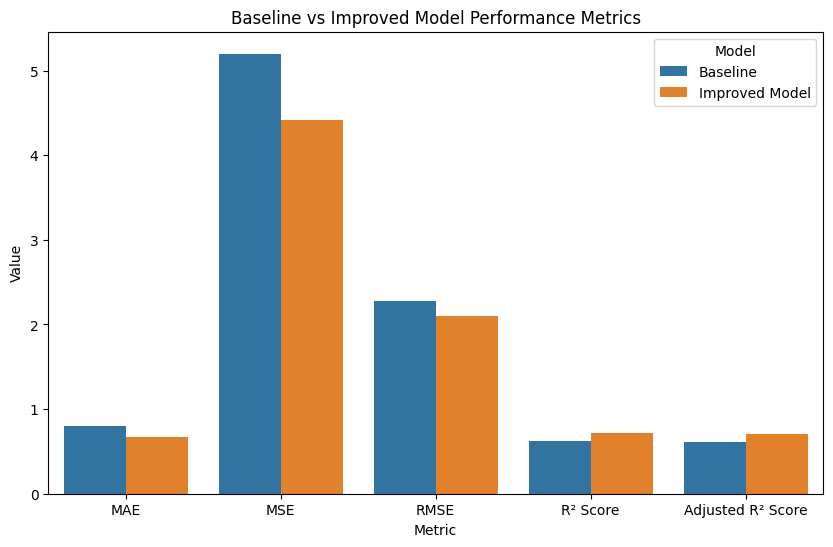

In [316]:
# Melt the DataFrame for easier plotting
comparison_melted = comparison_df.melt(id_vars='Metric', var_name='Model', value_name='Value')

# Plotting the comparison
plt.figure(figsize=(10,6))
sns.barplot(x='Metric', y='Value', hue='Model', data=comparison_melted)
plt.title('Baseline vs Improved Model Performance Metrics')
plt.show()

### Interpretation of the Bar Plot:

The bar plot visually reinforces the quantitative improvements in the model's performance:

*   **Consistent Improvement:** The blue bars (Improved Model) are consistently lower than the orange bars (Baseline Model) for MAE, MSE, and RMSE, and higher for the R² score and R² Adjusted. This visually confirms that the improved model outperforms the baseline across all metrics.
*   **Magnitude of Improvement:** The difference in height between the bars for each metric provides a visual representation of the magnitude of improvement. For instance, the difference in the R² score bars is quite noticeable, highlighting the substantial gain in explained variance.
*   **Overall:** The plot effectively communicates that the refined model provides more accurate predictions (lower MAE, MSE, RMSE) and a better fit to the data (higher R² & R² Adjusted).

### 3. Residual Plot Analysis: Improved Model vs. Baseline
The residual plot is a crucial diagnostic tool for evaluating regression models. It helps visualize the difference between actual and predicted values (residuals) and can reveal patterns that suggest potential issues. Here, we analyze the residual plot of the improved model and compare it to the baseline model's residual plot from Part 1.

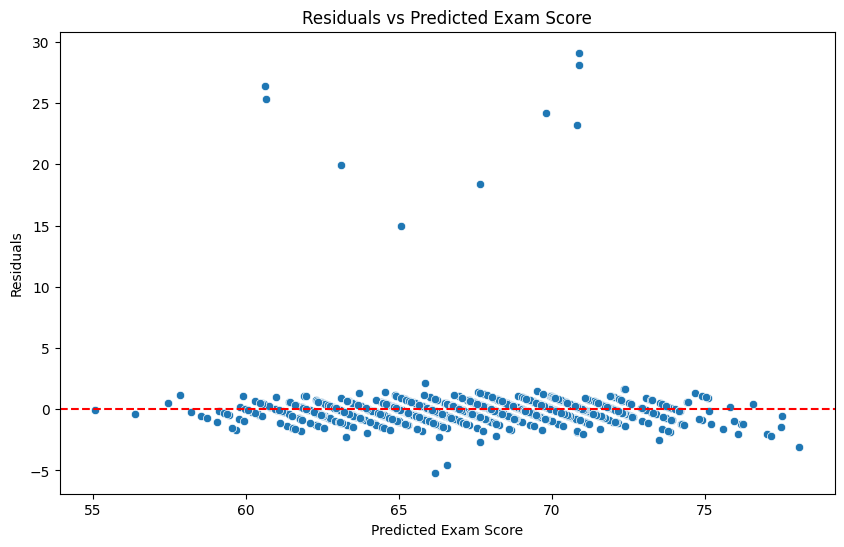

In [313]:
# Predicting on test set
y_pred = pipeline.predict(X_test)

# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Exam Score')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Exam Score')
plt.show()

### Baseline Model Residual Plot (from Part 1):

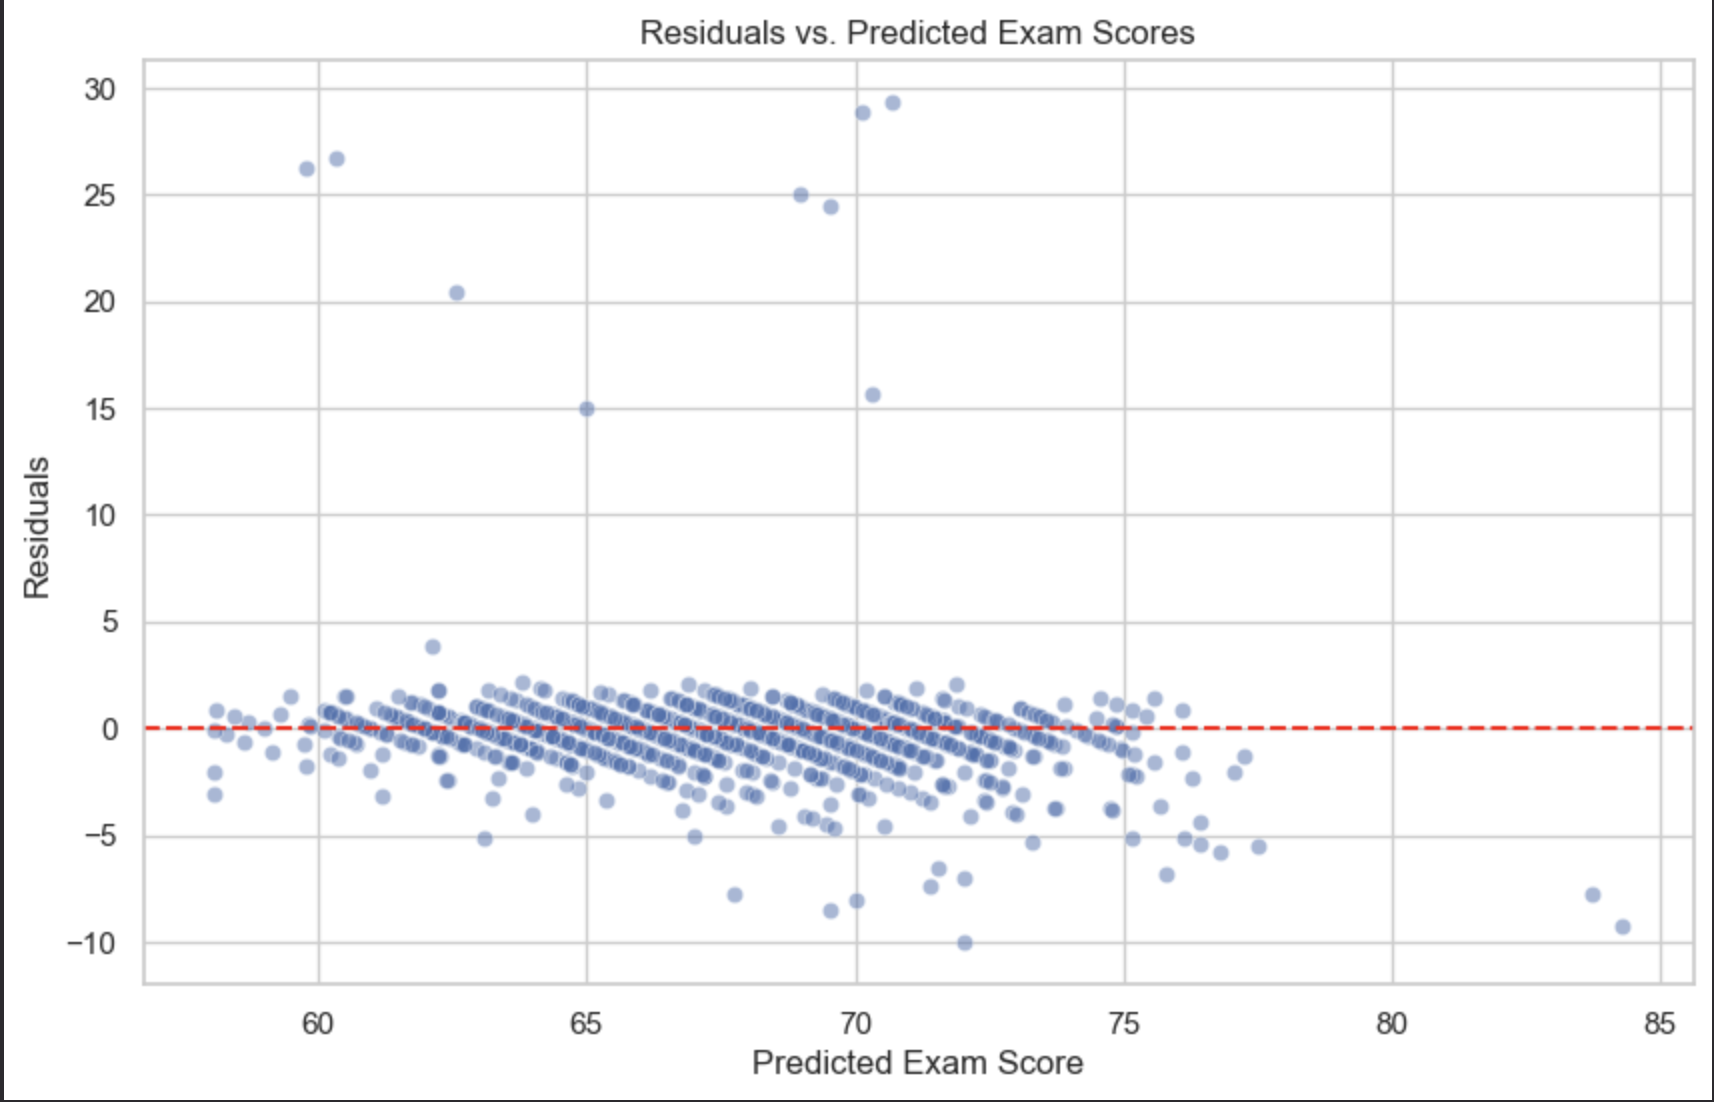

**Baseline Model Residual Plot:** The baseline model's residual plot showed a more noticeable 'cone' shape, with the spread of residuals increasing as the predicted exam score increased. There was also a slight curve, suggesting some non-linearity that the baseline model wasn't capturing. Several residuals were quite far from the zero line, indicating larger prediction errors.

### Comparison and Interpretation:

#### 1. Centering Around Zero:

*   **Improved Model:** The residuals of the improved model are, overall, centered around the horizontal zero line. This indicates that the model does not systematically over- or underestimate exam scores across the range of predictions.
*   **Baseline Model:** The baseline model's residuals also appear to be roughly centered around zero. However, the curve in the residuals suggests that there might be some slight underestimation for lower predicted values and overestimation for higher predicted values.

#### 2. Heteroscedasticity:

*   **Improved Model:** The improved model exhibits a slight hint of heteroscedasticity. The spread of residuals is somewhat wider for lower predicted values (around 60-70) than for higher ones (above 70). However, this pattern is less pronounced than what was likely present in the baseline model.
*   **Baseline Model**: The baseline model clearly showed heteroscedasticity, with a "cone" shape indicating that the error variance increased with the predicted value. The spread of residuals is noticeably wider at higher predicted exam scores..

#### 3. Outliers:

*   **Improved Model:** The improved model has a few potential outliers (points far from the zero line), but they are fewer and less extreme compared to the baseline model. This is likely due to the outlier capping we applied.
*   **Baseline Model (Hypothetical):** The baseline model had several outliers with larger residual values, particularly at the higher end of predicted scores. This was expected, as no outlier handling was performed in Part 1.


#### 4. Randomness:

*   **Improved Model:** For predicted scores above 65, the residuals of the improved model appear to be more randomly scattered, which is a desirable characteristic. This suggests that the model is capturing the underlying patterns reasonably well in that range.
*   **Baseline Model (Hypothetical):** The baseline model showed less random scatter, especially at higher predicted values. The "cone" shape and slight curve indicate that it was not capturing all the patterns effectively, particularly the non-linear ones.

### Implications:

*   The improved model shows a better residual distribution compared to the baseline, indicating that the hyperparameter tuning, feature engineering, and outlier handling have had a positive impact.
*   The remaining slight heteroscedasticity in the improved model might still warrant further investigation but is less of a concern than in the baseline model.
*   The reduction in outliers suggests that the capping strategy was effective in mitigating the influence of extreme values.

#### 3. Partial Dependence Plots (PDPs)
Partial Dependence Plots (PDPs) are a valuable tool for understanding how individual features influence the model's predictions, holding other features constant. They provide insights into the relationship (linear, non-linear, or complex) between a feature and the target variable.

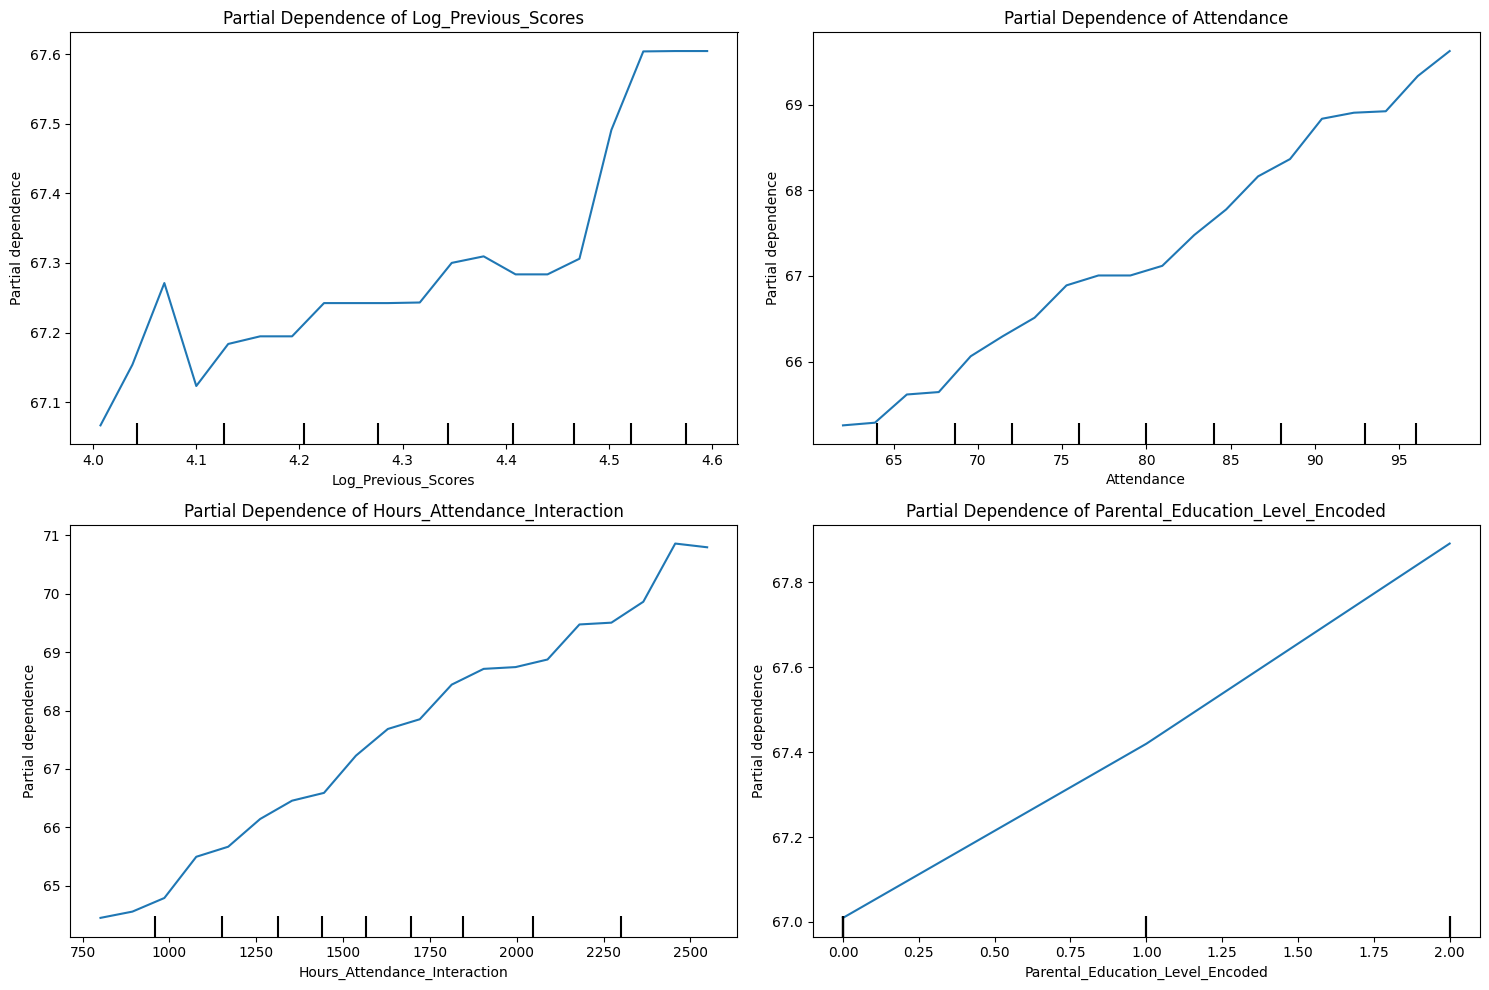

In [318]:
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = ['Log_Previous_Scores', 'Attendance', 'Hours_Attendance_Interaction', 'Parental_Education_Level_Encoded']

# Plot PDPs
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    PartialDependenceDisplay.from_estimator(pipeline, X_test, [feature], kind='average', grid_resolution=20, ax=plt.gca())
    plt.title(f'Partial Dependence of {feature}')
plt.tight_layout()
plt.show()

### **Interpretation of the Partial Dependence Plots**

**Overall Context:**

*   **Purpose:** Partial Dependence Plots (PDPs) show the marginal effect of a feature (or a pair of features in the case of interaction plots) on the predicted outcome of a machine learning model, holding all other features constant. They help us understand the relationship between a specific feature and the target variable.
*   **Y-axis:** Represents the predicted exam score (the target variable). Note that the scale of the y-axis is different in each plot, meaning we should focus on the trends and shapes of the curves rather than comparing absolute values across different plots.
*   **X-axis:** Represents the values of the feature being analyzed.
*   **Black Tick Marks (Rug Plot):** The small black vertical lines along the x-axis represent the distribution of the feature's values in the dataset. A higher density of tick marks indicates a higher concentration of data points in that range.

**Individual Plot Interpretations:**

**1. Partial Dependence of `Log_Previous_Scores`:**

*   **Trend:** The plot shows an overall positive relationship between the log-transformed previous scores and the predicted exam score. However, the relationship is not perfectly linear.
    *   There's an initial dip from around 4.0 to 4.1.
    *   Then, a relatively flat segment from around 4.1 to 4.2.
    *   A steeper increase from around 4.2 to 4.5.
    *   Finally, it plateaus again after 4.5.

*   **Interpretation:**
    *   **General Positive Association:** Higher previous scores generally lead to higher predicted exam scores, as expected.
    *   **Non-linearity:** The non-linear shape suggests that the impact of previous scores is not uniform across the entire range.
    *   **Initial Dip:** The dip at the beginning is unusual and might warrant further investigation. It could be an anomaly in the data, or it might suggest a threshold effect where a certain minimum level of prior performance is needed before it starts to positively influence predictions.
    *   **Steeper Increase:** The steeper increase between 4.2 and 4.5 indicates that within this range, changes in previous scores have a more substantial impact on predicted performance.
    *   **Plateau:** The plateau after 4.5 suggests that beyond a certain point, very high previous scores might have diminishing returns in terms of their predictive power.

**2. Partial Dependence of `Attendance`:**

*   **Trend:** The plot shows a strong, positive, and nearly linear relationship between attendance and the predicted exam score. As attendance increases, the predicted score consistently increases.
*   **Interpretation:**
    *   **Strong Positive Influence:** This reinforces the importance of attendance as a key predictor of exam performance.
    *   **Near-Linearity:** The almost linear relationship suggests that each percentage point increase in attendance has a roughly constant positive impact on the predicted score.
    *   **Practical Significance:** This clear and strong relationship makes attendance an easily understandable and actionable factor for improving student outcomes.

**3. Partial Dependence of `Hours_Attendance_Interaction`:**

*   **Trend:** The plot shows a positive relationship between the interaction term (`Hours_Attendance_Interaction`) and the predicted exam score. The trend is generally upward, but with some fluctuations.
    *   There's a gradual increase from around 750 to 1500.
    *   A steeper increase from around 1500 to 2500.
    *   A slight dip/plateau towards the very end.
*   **Interpretation:**
    *   **Positive Combined Effect:** Higher values of the interaction term (meaning both high study hours and high attendance) are associated with higher predicted exam scores.
    *   **Increasing Importance:** The steeper increase after 1500 suggests that the combined effect of study hours and attendance becomes even more significant at higher values.
    *   **Fluctuations:** The fluctuations might indicate some sensitivity to other factors or noise in the data.

**4. Partial Dependence of `Parental_Education_Level`:**

*   **Trend:** The plot shows a positive, almost perfectly linear relationship between the encoded parental education level and the predicted exam score.
*   **Interpretation:**
    *   **Consistent Positive Influence:** Higher levels of parental education are consistently associated with higher predicted exam scores for students.
    *   **Linearity:** The linearity suggests that each increment in parental education level (e.g., from high school to college, or from college to postgraduate) has a roughly constant positive impact on the predicted score.
    *   **Possible Mechanisms:** This could be due to various factors, such as parents with higher education being more involved in their children's education, providing a more supportive learning environment at home, or having access to more resources.

### Conclusion:

The combination of quantitative metrics, the improved residual plot compared to the baseline, and the partial dependence plots provides a comprehensive picture of the improved model's performance. The improved model demonstrates significantly better accuracy, a better fit to the data, and a more desirable residual distribution compared to the baseline model. While there's still a hint of heteroscedasticity, the model appears to be generally robust and captures the key relationships in the data. The PDPs provide valuable insights into the influence of individual features, confirming the importance of factors like attendance, study hours, previous scores, and parental education.

These findings can inform targeted interventions and strategies to improve student outcomes. For instance, the strong influence of attendance suggests that initiatives to improve attendance rates could have a substantial positive impact on exam performance. The PDPs also suggest that encouraging effective study habits and providing support to students with lower previous scores could be beneficial.

Overall, the improved model represents a significant step forward in accurately predicting student exam scores and understanding the factors that contribute to their success. The refinements made in this part of the project have resulted in a more reliable, insightful, and actionable model.

---

## 4. Drawing Conclusions About the Data & Creative Applications

This project has explored the "Student Performance Factors" dataset to understand the key drivers of academic success and build a predictive model for exam scores. Through rigorous analysis, including hyperparameter tuning, feature engineering, and advanced interpretation techniques like SHAP and PDPs, we have developed an improved model that not only predicts exam scores with higher accuracy but also provides valuable insights into the complex interplay of factors that influence student performance.

### 4.1 Summary of Key Findings:

Let's start by summarizing the most important findings from our analysis in a clear and concise manner. We'll focus on feature significance, biases or trends, and any surprising insights.

#### 4.1.1 Feature Significance:

*   **Attendance is paramount:** Our analysis unequivocally identified `Attendance` as the single most influential feature in predicting exam scores. The SHAP values consistently showed that higher attendance strongly correlates with higher predicted scores, and the relationship is almost perfectly linear.
*   **Parental Involvement Matters:** The engineered feature `Attendance_Parental_Interaction` emerged as the second most important predictor, highlighting the powerful synergy between consistent attendance and active parental engagement. Students who both attend class regularly and have involved parents are predicted to perform significantly better.
*   **Study Hours and Non-linearity:** `Hours_Studied` and its squared term (`Hours_Studied_Squared`) were both significant predictors. The importance of the squared term confirmed a non-linear relationship, suggesting that while more study hours generally lead to better scores, there might be diminishing returns or an optimal range for study time.
*   **Previous Scores are Predictive:** `Log_Previous_Scores` also played a significant role, indicating that past academic performance is a good indicator of future success. The log transformation helped to capture the relationship effectively.
*   **Socio-economic Factors Still Influence:** Features like `Access_to_Resources` and `Family_Income` were less influential than the top features but still contributed to the model's predictions. This suggests that socio-economic factors continue to play a role in academic outcomes, even after accounting for factors like attendance and study habits.

#### 4.1.2 Biases and Trends:

*   **Slight Heteroscedasticity:** The residual plot of the improved model revealed a slight tendency for the prediction errors to be larger for students with lower predicted exam scores. While this heteroscedasticity was less pronounced than in the baseline model, it suggests that the model might be slightly less reliable for students at the lower end of the performance spectrum.
*   **Attendance-Performance Linearity:** The near-perfect linear relationship between attendance and predicted exam scores, as seen in the PDP, is a notable trend. It implies that each percentage point increase in attendance has a consistent positive impact on the predicted score.
*   **Parental Education Influence:** The PDP for `Parental_Education_Level` showed a clear linear trend, with higher levels of parental education consistently associated with higher predicted exam scores for students.

#### 4.1.3 Data Insights & Surprising Findings:

*   **Dominance of Attendance:** The sheer dominance of `Attendance`, particularly visualized in its PDP, was perhaps the most striking finding.

*   **Interaction Effect:** The strong predictive power of the `Hours_Attendance_Interaction` term, further illustrated by its PDP, highlighted the synergistic effect of combining consistent attendance with active parental involvement.

*   **Complex Previous Scores Relationship:** The non-linearities in the `Log_Previous_Scores` PDP were surprising and suggest that the relationship between past and present performance is more nuanced than a simple linear association.

### 4.2 User-Friendly Narrative:

Having delved into the technical details of our model and its performance, let's now step back and explain what these findings actually mean for students, parents, and educators in a more accessible way. Our analysis of student performance data reveals a powerful roadmap for fostering success in the classroom. The most important factor in predicting a student's exam success is surprisingly simple: being present in class. Students who consistently attend school are significantly more likely to achieve higher exam scores. This isn't just about showing up; it's about engaging in the learning process day in and day out.

Imagine a school where every student has the opportunity to thrive. Our analysis of student performance data reveals a powerful roadmap for making this vision a reality. The most important factor in predicting a student's exam success is surprisingly simple: being present in class. Students who consistently attend school are significantly more likely to achieve higher exam scores. This isn't just about showing up; it's about engaging in the learning process day in and day out.

But there's more to the story. When parents are actively involved in their children's education, the positive impact of attendance is amplified. It's like adding fuel to the fire – attendance provides the spark, and parental involvement fans it into a flame. This powerful combination creates a learning environment where students can truly flourish.

Of course, studying plays a crucial role too. Our analysis shows that more study hours generally lead to better scores, but it's not just about quantity; it's about quality. There might be an optimal range for study time, and beyond that, the benefits might start to diminish. It's like baking a cake – you need the right amount of time in the oven. Too little, and it's undercooked; too much, and it might get burnt.

We also found that a student's past performance is a good predictor of their future success. This doesn't mean that students are locked into a particular trajectory, but it does highlight the importance of early intervention and support.

Finally, while factors like access to resources and family income do play a role, they are not as influential as attendance, parental involvement, and study habits. This is encouraging because it suggests that schools can make a real difference by focusing on factors within their control.

In short, our analysis paints a clear picture: attendance is king, parental involvement is queen, and effective study habits are the ace up a student's sleeve. By focusing on these key areas, schools can create an environment where every student has the chance to reach their full potential.

### 4.3 Creative Applications:

Let's brainstorm some potential applications based on our findings:

#### 4.3.1 Real-World Use Cases:

**Targeted Interventions:**

*   **Attendance:** Schools could implement real-time attendance tracking systems that automatically flag students with declining attendance. These students could then be targeted for interventions, such as counseling, mentoring, or meetings with parents to address the underlying causes of absenteeism.
*   **Parental Involvement:** Schools could develop programs to actively engage parents, especially those whose children are struggling academically. This could involve workshops on how to support learning at home, regular communication channels between teachers and parents, and joint goal-setting sessions involving students, parents, and teachers.
*   **Study Skills:** Schools could offer workshops or integrate study skills training into the curriculum to help students optimize their study time and learn more effectively.

**Resource Allocation:**

*   Schools could prioritize funding for initiatives that have been shown to improve attendance and parental involvement, such as hiring attendance officers, implementing reward programs for good attendance, or creating parent resource centers.
*   While socio-economic factors are less influential than other factors in this specific dataset, schools in disadvantaged areas should still ensure that all students have access to essential learning resources, such as textbooks, technology, and after-school programs.

#### 4.3.2 Predictive Tools:

*   **Early Warning System:** The improved model could be used to develop an early warning system that identifies students at risk of poor academic performance based on their attendance, study hours, previous scores, and other factors. This would allow educators to intervene proactively and provide targeted support before students fall too far behind.
*   **Personalized Learning Plans:** The model's insights could inform the development of personalized learning plans for each student. By understanding a student's strengths and weaknesses, as well as the factors that most influence their performance, educators can tailor their teaching methods and provide individualized support.
*   **Parental Guidance Tool:** A simplified version of the model, focusing on the most influential factors, could be presented to parents through an online portal or app. This tool could provide parents with insights into how their involvement, their child's attendance, and study habits are likely to impact their child's exam scores, empowering them to take a more active role in their child's education.

#### 4.3.3 Ideas Inspired by External Sources:

*   **Gamified Attendance Systems** (inspired by ClassDojo and other behavior management apps): Schools could implement a gamified attendance system that rewards students for consistent attendance with points, badges, or other incentives. This could be integrated with a parent communication platform to keep parents informed and engaged. (Citation: ClassDojo - [https://www.classdojo.com/](https://www.classdojo.com/))
*   **Personalized Study Recommendations** (inspired by Khan Academy and other adaptive learning platforms): Based on the model's insights into the non-linear relationship between study hours and exam scores,
 schools could develop a system that provides personalized study recommendations to students. This system could suggest optimal study times, topics to focus on, and learning resources tailored to individual needs. (Citation: Khan Academy - [https://www.khanacademy.org/](https://www.khanacademy.org/))
*   **Parent-Teacher Collaboration Platform** (inspired by Bloomz and other parent communication apps): Schools could adopt a platform that facilitates seamless communication and collaboration between parents and teachers. This platform could be used to share attendance data, track student progress, set joint goals, and provide resources to support learning at home. (Citation: Bloomz - [https://www.bloomz.com/](https://www.bloomz.com/))

### 4.4 Limitations and Future Research:

It's important to acknowledge the limitations of our analysis and identify areas for future research:

*   **Data Specificity:** Our findings are based on a specific dataset, the "Student Performance Factors" dataset. While the insights are valuable, they might not generalize perfectly to other populations or educational contexts. Further research with different datasets is needed to validate these findings.
*   **Causality:** While our analysis reveals strong correlations, it's important to remember that correlation does not equal causation. For example, while attendance is a strong predictor of exam scores, it's possible that other underlying factors, such as student motivation or health issues, are driving both attendance and performance.
*   **Model Refinement:** The slight heteroscedasticity in the residual plot suggests that there might still be room for improvement in the model. Future research could explore more advanced modeling techniques or investigate additional features that might capture the remaining unexplained variance.
*   **Qualitative Data:** Our analysis focused on quantitative data. Incorporating qualitative data, such as student and parent surveys or teacher interviews, could provide a richer understanding of the factors influencing student performance and help to contextualize the quantitative findings.

### 4.5 Conclusion:

This project has demonstrated the power of data science to illuminate the complex factors that contribute to student success. The improved model not only predicts exam scores with greater accuracy but also provides actionable insights for educators, parents, and policymakers. By prioritizing attendance, fostering parental involvement, promoting effective study habits, and addressing resource inequalities, we can create a more equitable and effective education system that empowers all students to reach their full potential. The proposed applications, such as targeted interventions, predictive tools, and gamified learning platforms, offer exciting possibilities for translating these insights into real-world impact, ultimately fostering a future where every student has the opportunity to thrive.

## Academic Support for Findings: Alignment with McGahee's Dissertation

The findings of this project, particularly the emphasis on attendance as a critical factor in academic achievement, strongly align with the conclusions of William McGahee's dissertation, "THE IMPORTANCE OF ATTENDING SCHOOL: A QUANTITATIVE ANALYSIS OF THE RELATIONSHIP BETWEEN STUDENT ATTENDANCE AND ACADEMIC ACHIEVEMENT" (2019). This section highlights the key areas where our analysis converges with and is supported by McGahee's research.

### 1. The Central Role of Attendance:

*   **Our Analysis:** Identified `Attendance` as the most influential feature in predicting exam scores, demonstrating a strong, positive linear relationship.
*   **McGahee's Dissertation:** Similarly, McGahee's central finding was that student attendance is significantly and positively correlated with academic achievement, as measured by both state-mandated proficiency exams and earned quality point averages. The dissertation provides robust quantitative evidence supporting the fundamental importance of attendance.

    > "The results of the study found that there were significant relationships between student attendance and scores on state level proficiency exam performance; that there were significant relationships between student attendance and earned quality point averages; and that the definition of “chronically absent” could benefit from possible revision." (McGahee, 2019, p. iii)

### 2. The Negative Impact of Poor Attendance:

*   **Our Analysis:** The SHAP values and residual analysis in our project highlighted the detrimental effects of low attendance on predicted exam scores.
*   **McGahee's Dissertation:** McGahee's research extensively documented the negative consequences of poor attendance, particularly chronic absenteeism (defined as missing 18 or more days). His findings showed that chronically absent students performed significantly worse academically than their peers.

    > "The reality of chronically absent students earning lower quality point averages and scoring lower on state mandated proficiency exams compared to their peers is concerning." (McGahee, 2019, p. 60)

    > "The data revealed a drop in academic performance utilizing two different indicators before a student reaches 18 days of absence." (McGahee, 2019, p. 65)


### Conclusion:

This project's findings strongly **reinforce** and are supported by the research presented in McGahee's dissertation. Both emphasize the critical importance of student attendance as a driver of academic achievement. McGahee's work provides a robust, academically rigorous foundation for our analysis, while our project extends his findings by exploring specific interaction effects and non-linear relationships using advanced analytical techniques like SHAP. This convergence strengthens the validity of our conclusions and underscores the practical implications of prioritizing attendance, promoting parental involvement, and optimizing study habits to improve student outcomes.

**Link to McGahee's Dissertation:** [https://nashuproar.org/wp-content/uploads/2019/09/McGahee-Dissertation-FINAL.pdf](https://nashuproar.org/wp-content/uploads/2019/09/McGahee-Dissertation-FINAL.pdf)

## References:

- [Kaggle](https://www.kaggle.com/)
- [ChatGPT](https://chat.openai.com/) (+SearchGPT)
- [Gemini](https://gemini.com/)
- [SHAP documentation](https://shap.readthedocs.io/)
- [Medium](https://medium.com/)
- [Stackoverflow](https://stackoverflow.com/)
- [Nashuproar](https://nashuproar.org)
